#CISC-873-DM-F22-A4: Airbnb price category prediction


the goal is predict the listing price based on the listing characteristics

##Download data from kaggle

In [ ]:
 !pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cisc-873-dm-f22-a4

 99% 598M/604M [00:04<00:00, 134MB/s]
100% 604M/604M [00:04<00:00, 128MB/s]


In [ ]:
!unzip /content/cisc-873-dm-f22-a4.zip

Streaming output truncated to the last 5000 lines.
  inflating: a4/img_train/3366.jpg   
  inflating: a4/img_train/3367.jpg   
  inflating: a4/img_train/3368.jpg   
  inflating: a4/img_train/3369.jpg   
  inflating: a4/img_train/337.jpg    
  inflating: a4/img_train/3370.jpg   
  inflating: a4/img_train/3371.jpg   
  inflating: a4/img_train/3372.jpg   
  inflating: a4/img_train/3373.jpg   
  inflating: a4/img_train/3374.jpg   
  inflating: a4/img_train/3375.jpg   
  inflating: a4/img_train/3376.jpg   
  inflating: a4/img_train/3377.jpg   
  inflating: a4/img_train/3378.jpg   
  inflating: a4/img_train/3379.jpg   
  inflating: a4/img_train/338.jpg    
  inflating: a4/img_train/3380.jpg   
  inflating: a4/img_train/3381.jpg   
  inflating: a4/img_train/3382.jpg   
  inflating: a4/img_train/3383.jpg   
  inflating: a4/img_train/3384.jpg   
  inflating: a4/img_train/3385.jpg   
  inflating: a4/img_train/3386.jpg   
  inflating: a4/img_train/3387.jpg   
  inflating: a4/img_train/3388.jpg   

##Data Loading 


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#read train and test files
df= pd.read_csv('a4/train_xy.csv')
df_test_K = pd.read_csv('a4/test_x.csv')

##Exploration of training data

In [ ]:
df.shape

(7627, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB


In [ ]:
df.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0


In [ ]:
#Check the data for missing values in training data
df.isnull().sum()

summary    301
image        0
type         0
price        0
dtype: int64

In [ ]:
#Check the data for duplicates 
df.duplicated().any()

False

In [ ]:
df['type'].value_counts()

Apartment                 5765
Condominium                691
House                      406
Loft                       324
Townhouse                  167
Serviced apartment          77
Bed and breakfast           38
Guest suite                 32
Hostel                      26
Bungalow                    25
Guesthouse                  14
Cottage                     12
Aparthotel                  12
Boutique hotel              10
Other                        8
Villa                        7
Tiny house                   3
Boat                         2
Cabin                        2
Camper/RV                    2
Casa particular (Cuba)       1
Hotel                        1
Earth house                  1
Castle                       1
Name: type, dtype: int64

In [ ]:
df['summary'].value_counts()

Featured in The New York Times, The Wall Street Journal, and Fast Company, we’ve hosted over 350k guests in 2,500+ spaces with an average rating of 4.6 stars. Each space is designed and run by us, so you’ll always know what to expect from your stay. At Sonder, we’ve combined the best parts of home and hotel. - 24/7 support via text, email, or phone - Coffee, fresh towels, and bathroom essentials provided - Hotel-standard cleaning before you arrive - Self check-in                        88
- Fully furnished apartment in the heart of downtown Montreal - WIFI (high speed internet), stove, refrigerator, heating, hot water and necessary furniture are included - Near Concordia University, Mcgill University, Université de Montréal, Lassale College, HEC, UQAM, Metro Guy Concordia, hospitals & restaurant  - Indoor parking available on demand                                                                                                                                              9
• Very comfo

In [ ]:
#describe the text column
df['summary'].describe()

count                                                  7326
unique                                                 6844
top       Featured in The New York Times, The Wall Stree...
freq                                                     88
Name: summary, dtype: object

In [ ]:
df.shape

(7627, 4)

In [ ]:
#check the target column 
df['price'].value_counts()

0    4737
1    2403
2     487
Name: price, dtype: int64

In [ ]:
# Distribution of label
df["price"].value_counts(normalize=True)

0    0.621083
1    0.315065
2    0.063852
Name: price, dtype: float64

In [ ]:
df.shape

(7627, 4)

In [ ]:
df.isnull().sum()

summary    301
image        0
type         0
price        0
dtype: int64

In [ ]:
df.isnull().sum().sum()

301

##First Solution

in this solution i will apply preprocessing method (resize image data, tokenization on text data and converting to integer IDs )   

###Data preprocessing for Training data

In [ ]:
df_FS=df

In [ ]:
df_FS.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0


In [ ]:
df_FS.shape

(7627, 4)

In [ ]:
df_FS.isnull().sum()

summary    301
image        0
type         0
price        0
dtype: int64

In [ ]:
#drop the rows which have null values
df_FS.dropna(axis = 0, inplace = True)

In [ ]:
df_FS.isnull().sum()

summary    0
image      0
type       0
price      0
dtype: int64

In [ ]:
df_FS.shape

(7326, 4)

In [ ]:
#converting the type of "type" column to categorical and encode it 
df_FS['type']=df_FS.type.astype('category')
df_FS['type_codes'] = df_FS.type.astype('category').cat.codes

#### preprocess image data

In [ ]:
import os
from tqdm.notebook import tqdm
from PIL import Image
from ast import literal_eval


In [ ]:
def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))
        arr = np.array(image)             
    except:
        arr = np.zeros((64, 64, 2))      
    return arr                            

In [ ]:
# loading images:
image_FS = np.array([load_image(i) for i in tqdm(df_FS.image)])

  0%|          | 0/7326 [00:00<?, ?it/s]

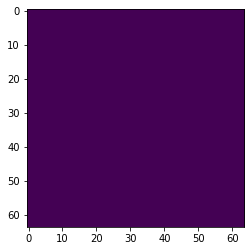

In [ ]:
# check image loading
import matplotlib.pyplot as plt
plt.imshow(image_FS[0, :, :, 0])

In [ ]:
#checking total shape of training data
np.shape(image_FS)

(7326, 64, 64, 2)

###split data

In [ ]:
from sklearn.model_selection import train_test_split
# split data (training/testing set)
df_train_FS, df_val_FS = train_test_split(df_FS, test_size=0.2, random_state=10)

In [ ]:
# loading overview: (force convert some of the non-string cell to string)
x_train_text_FS = df_train_FS.summary.astype('str')
# loading images:
x_train_image_FS = np.array([load_image(i) for i in tqdm(df_train_FS.image)])

# get type
y_train_type_FS = df_train_FS.type_codes

# get price
y_train_price_FS = df_train_FS.price

  0%|          | 0/5860 [00:00<?, ?it/s]

In [ ]:
print("x_train_text_FS.shape >>>> ",x_train_text_FS.shape)
print("x_train_image_FS.shape >>>> ",x_train_image_FS.shape)
print("y_train_type_FS.shape >>>> ",y_train_type_FS.shape)
print("y_train_price_FS.shape >>>> ",y_train_price_FS.shape)

x_train_text_FS.shape >>>>  (5860,)
x_train_image_FS.shape >>>>  (5860, 64, 64, 2)
y_train_type_FS.shape >>>>  (5860,)
y_train_price_FS.shape >>>>  (5860,)


In [ ]:
# loading overview: (force convert some of the non-string cell to string)
x_val_text_FS = df_val_FS.summary.astype('str')
# loading images:
x_val_image_FS = np.array([load_image(i) for i in tqdm(df_val_FS.image)])

# get type
y_val_type_FS = df_val_FS.type_codes

# get price
y_val_price_FS = df_val_FS.price

  0%|          | 0/1466 [00:00<?, ?it/s]

In [ ]:
print("x_val_text_FS.shape >>>> ",x_val_text_FS.shape)
print("x_val_image_FS.shape >>>> ",x_val_image_FS.shape)
print("y_val_type_FS.shape >>>> ",y_val_type_FS.shape)
print("y_val_price_FS.shape >>>> ",y_val_price_FS.shape)

x_val_text_FS.shape >>>>  (1466,)
x_val_image_FS.shape >>>>  (1466, 64, 64, 2)
y_val_type_FS.shape >>>>  (1466,)
y_val_price_FS.shape >>>>  (1466,)


###Data preprocessing for Training data (preprocess text data) cont

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint

vocab_size = 40000
max_len = 100

# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_text_FS)

In [ ]:
def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
    )

In [ ]:
x_train_summary_FS = _preprocess(x_train_text_FS)
print(x_train_summary_FS.shape)

(5860, 100)


In [ ]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_train_summary_FS[:5]))

['featured in the new york times the wall street journal and fast company '
 'we’ve hosted over 350k guests in 2 500 spaces with an average rating of 4 6 '
 'stars each space is designed and run by us so you’ll always know what to '
 'expect from your stay at sonder we’ve combined the best parts of home and '
 'hotel 24 7 support via text email or phone coffee fresh towels and bathroom '
 'essentials provided hotel standard cleaning before you arrive self check in',
 'our home is on the first floor of a charming duplex it has two large '
 'bedrooms a living room a washroom with a shower bathtub an open kitchen and '
 'dining room a beautiful spacious deck with a bbq and a backyard our home is '
 "perfect for young families it is close to numerous parks and has children's "
 'books toys and board games bath toys a sandbox in the backyard and a playpen '
 'travel crib our extensive board game collection is also perfect for game '
 'lovers of all ages',
 'my place is good for couples solo

In [ ]:
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 40000


In [ ]:
x_val_summary_FS = _preprocess(x_val_text_FS)
print(x_val_summary_FS.shape)

(1466, 100)


In [ ]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_val_summary_FS[:5]))

['spacious studio located downtown right into the middle of the action near '
 'saint catherine street east and within walking distance to guy concordia '
 'metro station 2min restaurants bars etc walkable distance to chinatown old '
 'port suitable for 1 or 2 people double bed but possible to fit up to 4 '
 'people because of the sofa bed high speed wifi no cable tv but smart tv '
 'netflix youtube portable air conditioning ideal in summer building amenities '
 'include a gym and an indoor pool',
 'agréable appartement 4 1 2 environ 70m2 situé dans le quartier côte des '
 'neiges avenue saint kevin tout près de l’oratoire du mont saint joseph une '
 'chambre est disponible avec lit 2 places étagères et fenêtre le salon étant '
 'assez grand il peut accueillir 2 autres personnes sur un matelas gonflable '
 "que nous pouvons vous fournir le logement dispose d'un thermostat dans "
 'chaque pièce la machine a laver et le sèche linge sont communs et aux sous 2',
 'grand appt dans le villag

###preprocessing for test data (Kaggle)

In [ ]:
df_test_FS_K=pd.read_csv('a4/test_x.csv')

In [ ]:
#convert the test summary column to string
x_test_text_FS_k = df_test_FS_K.summary.astype('str')
#apply _preprocess function on summary
x_test_summary_FS_k = _preprocess(x_test_text_FS_k)
#apply the load_image method on test images 
x_test_image_FS_k = np.array([load_image(i) for i in tqdm(df_test_FS_K.image)])

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
print("x_test_summary_FS_k.shape >>>> ",x_test_summary_FS_k.shape)
print("x_test_image_FS_k.shape >>>> ",x_test_image_FS_k.shape)

x_test_summary_FS_k.shape >>>>  (7360, 100)
x_test_image_FS_k.shape >>>>  (7360, 64, 64, 2)


##trials

In [ ]:
def train_val_loss_plt_price(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
  fig.suptitle('price model results')
  # first we display the training price accuracy in red color VS. the validation price accuracy in blue color through the epochs
  ax1.plot(history.history['price_sparse_categorical_accuracy'], 'b')
  ax1.plot(history.history['val_price_sparse_categorical_accuracy'], 'r')
  ax1.set_title('price accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epochs')
  ax1.legend(['tr_price_acc', 'val_price_acc'])
  ax1.grid()
  # on this axis, we plot the price training loss in red color VS. the price validation loss in blue color through the epochs
  ax2.plot(history.history['price_loss'], 'b')
  ax2.plot(history.history['val_price_loss'], 'r')
  ax2.set_title('price loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['tr_price_loss', 'val_price_loss'])
  ax2.grid()
  plt.show()

In [ ]:
def train_val_loss_plt_type(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
  fig.suptitle('type model results')
  # first we display the training price accuracy in red color VS. the validation price accuracy in blue color through the epochs
  ax1.plot(history.history['type_sparse_categorical_accuracy'], 'b')
  ax1.plot(history.history['val_type_sparse_categorical_accuracy'], 'r')
  ax1.set_title('type accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epochs')
  ax1.legend(['tr_type_acc', 'val_type_acc'])
  ax1.grid()
  # on this axis, we plot the price training loss in red color VS. the price validation loss in blue color through the epochs
  ax2.plot(history.history['type_loss'], 'b')
  ax2.plot(history.history['val_type_loss'], 'r')
  ax2.set_title('type loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['tr_type_loss', 'val_type_loss'])
  ax2.grid()
  plt.show()

In [ ]:
def train_val_loss_plt_model(history):

  fig, (ax1) = plt.subplots(1, 1, figsize=(25,7))
  fig.suptitle('model results')
  ax1.plot(history.history['loss'], 'b')
  ax1.plot(history.history['val_loss'], 'r')
  ax1.set_title('model loss')
  ax1.set_ylabel('loss')
  ax1.set_xlabel('epoch')
  ax1.legend(['tr_model_loss', 'val_model_loss'])
  ax1.grid()
  plt.show()

In [ ]:
len_price = len(df_FS.price.unique())
len_price

3

In [ ]:
len_type = len(df_FS.type.unique())
len_type

24

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPool2D,SpatialDropout1D,SimpleRNN
from tensorflow.keras.optimizers import Adam

###Trial_1

in this trial, for text part i will use average of embedding and for image part i will use simple conv2d

In [ ]:

# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))
# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)
# image part 
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_29 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_15 (Conv2D)             (None, 49, 49, 32)   16416       ['input_30[0][0]']               
                                                                                                  
 embedding_12 (Embedding)       (None, 100, 100)     4000000     ['input_29[0][0]']               
                                                                                           

In [ ]:
history = model.fit(
     x={
        'summary': x_train_summary_FS,
        'image': x_train_image_FS
    },
    y={
        'type': y_train_type_FS,
        'price': y_train_price_FS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 58s 194ms/step - loss: 1.0682 - price_loss: 0.8466 - type_loss: 1.2899 - price_sparse_categorical_accuracy: 0.6250 - type_sparse_categorical_accuracy: 0.7504 - val_loss: 0.9021 - val_price_loss: 0.8290 - val_type_loss: 0.9752 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 2/15
293/293 [==============================] - 56s 191ms/step - loss: 0.8931 - price_loss: 0.8043 - type_loss: 0.9819 - price_sparse_categorical_accuracy: 0.6284 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.8821 - val_price_loss: 0.8059 - val_type_loss: 0.9583 - val_price_sparse_categorical_accuracy: 0.6229 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 3/15
293/293 [==============================] - 56s 192ms/step - loss: 0.8541 - price_loss: 0.7612 - type_loss: 0.9470 - price_sparse_categorical_accuracy: 0.6549 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.8576 - val_price_loss: 0

In [ ]:
history_FS_T1=history

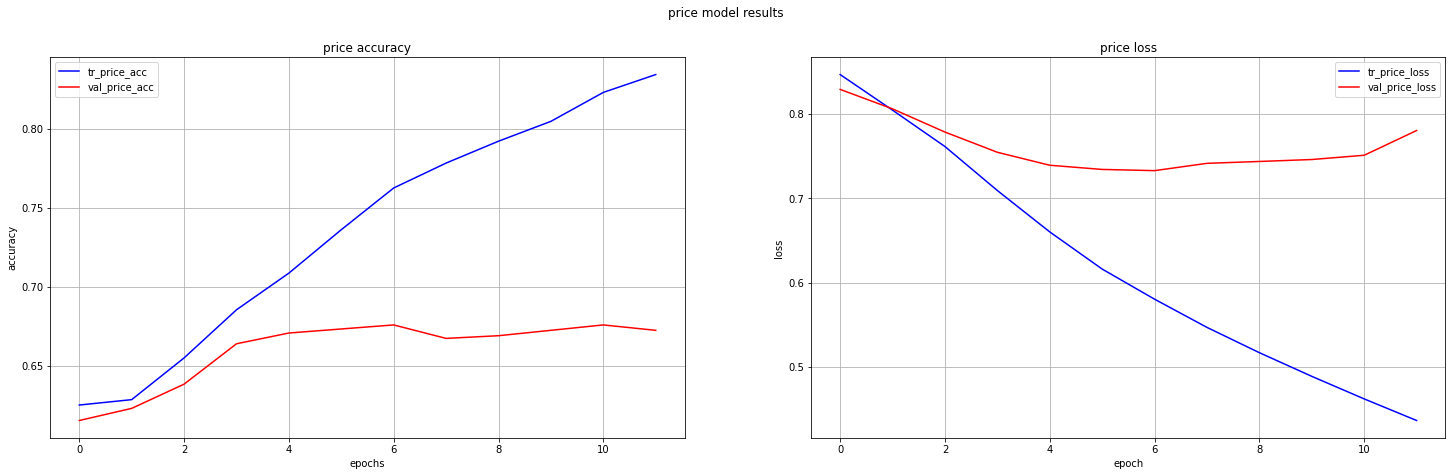

In [ ]:
train_val_loss_plt_price(history_FS_T1)

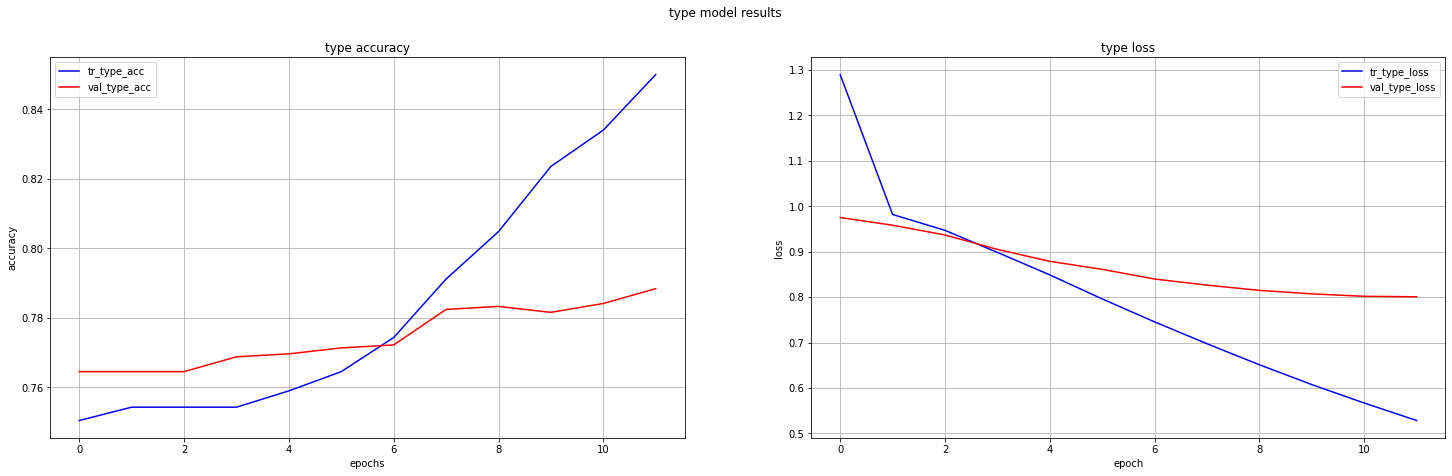

In [ ]:
train_val_loss_plt_type(history_FS_T1)

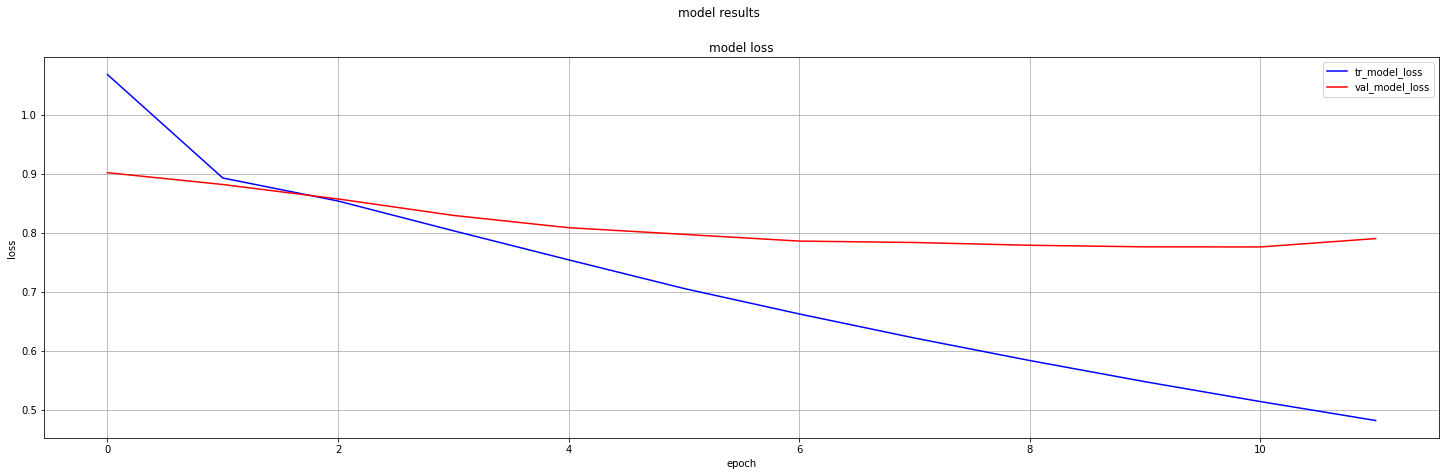

In [ ]:
train_val_loss_plt_model(history_FS_T1)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_FS,
        'image': x_val_image_FS},
  y= {'price': y_val_price_FS,
    'type':y_val_type_FS})
print("test loss, test acc:", res_eva)


46/46 [==============================] - 3s 72ms/step - loss: 0.7814 - price_loss: 0.7146 - type_loss: 0.8481 - price_sparse_categorical_accuracy: 0.6760 - type_sparse_categorical_accuracy: 0.7776
test loss, test acc: [0.7813806533813477, 0.7146434187889099, 0.8481178283691406, 0.6759890913963318, 0.7776262164115906]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_FS_k,
        'image': x_test_image_FS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 20s 84ms/step
[[0.7040245  0.23609298 0.05988244]
 [0.918882   0.06749817 0.01361982]
 [0.81115705 0.14333703 0.04550593]
 ...
 [0.74939567 0.21070573 0.03989857]
 [0.9112553  0.06405749 0.02468707]
 [0.6903919  0.2547719  0.05483615]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_FS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_FS_T1.csv', index=False)


the score of evalution model in this trial is  [loss: 0.7918 - price_loss: 0.7182 - type_loss: 0.8655 - price_sparse_categorical_accuracy: 0.6698 - type_sparse_categorical_accuracy: 0.7701]

 the test score on the kaggle leaderboard is 0.684

###Trial_2

in this trial  i will add depth to image by adding conv2D Layer and maxpooling layers and use SimpleRNN after embedded layer for text




In [ ]:

# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
#SpatialDropout1D layer
l1 = SpatialDropout1D(0.2)(embedded)
#Simple RNN Layer
SimpleRNN_lay = SimpleRNN(32, dropout=0.5,recurrent_regularizer='l2')(l1)

# image part 
cov = Conv2D(32, (3, 3))(in_image) 
pl = MaxPool2D((3, 3))(cov) 
cov2 = Conv2D(32, (2,2))(pl) 
pl2 = MaxPool2D((2,2))(cov2) 
flattened = Flatten()(pl2) 

# fusion - combinig both
fused = tf.concat([SimpleRNN_lay, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_32 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 62, 62, 32)   608         ['input_32[0][0]']               
                                                                                                  
 input_31 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 max_pooling2d_16 (MaxPooling2D  (None, 20, 20, 32)  0           ['conv2d_16[0][0]']              
 )                                                                                         

In [ ]:
history = model.fit(
     x={
        'summary': x_train_summary_FS,
        'image': x_train_image_FS
    },
    y={
        'type': y_train_type_FS,
        'price': y_train_price_FS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 32s 104ms/step - loss: 1.1177 - price_loss: 0.8507 - type_loss: 1.1143 - price_sparse_categorical_accuracy: 0.6227 - type_sparse_categorical_accuracy: 0.7464 - val_loss: 0.9516 - val_price_loss: 0.8448 - val_type_loss: 0.9927 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 2/15
293/293 [==============================] - 30s 103ms/step - loss: 0.9409 - price_loss: 0.8408 - type_loss: 1.0171 - price_sparse_categorical_accuracy: 0.6248 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.9277 - val_price_loss: 0.8531 - val_type_loss: 0.9973 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 3/15
293/293 [==============================] - 30s 102ms/step - loss: 0.9264 - price_loss: 0.8387 - type_loss: 1.0124 - price_sparse_categorical_accuracy: 0.6248 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.9197 - val_price_loss: 0

In [ ]:
history_FS_T2=history

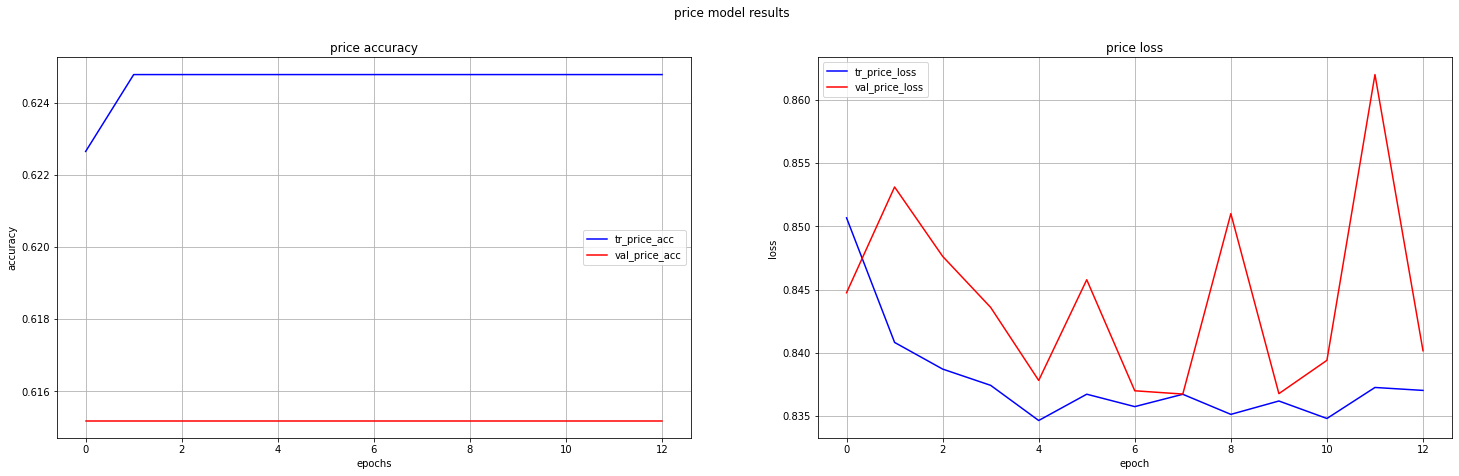

In [ ]:
train_val_loss_plt_price(history_FS_T2)

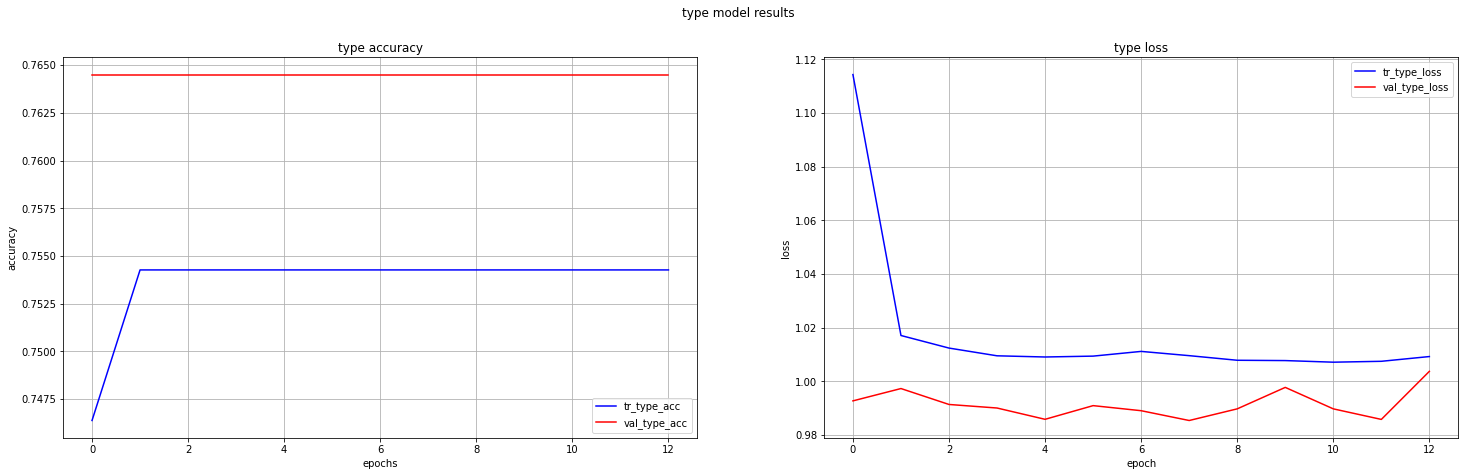

In [ ]:
train_val_loss_plt_type(history_FS_T2)

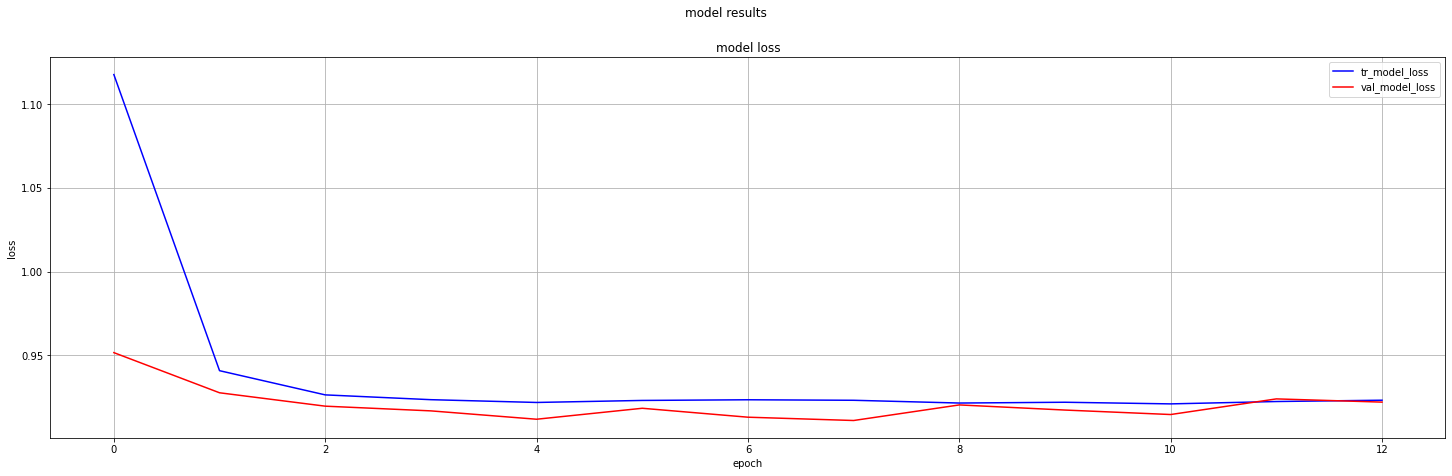

In [ ]:
train_val_loss_plt_model(history_FS_T2)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_FS,
        'image': x_val_image_FS},
  y= {'price': y_val_price_FS,
    'type':y_val_type_FS})
print("test loss, test acc:", res_eva)

46/46 [==============================] - 1s 32ms/step - loss: 0.9324 - price_loss: 0.8489 - type_loss: 1.0158 - price_sparse_categorical_accuracy: 0.6112 - type_sparse_categorical_accuracy: 0.7674
test loss, test acc: [0.9323735237121582, 0.8489397168159485, 1.015758991241455, 0.6111869215965271, 0.7673942446708679]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_FS_k,
        'image': x_test_image_FS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 7s 32ms/step
[[0.61316663 0.32406172 0.06277164]
 [0.61316663 0.32406172 0.06277164]
 [0.61316663 0.32406172 0.06277164]
 ...
 [0.61316663 0.32406172 0.06277164]
 [0.61316663 0.32406172 0.06277164]
 [0.61316663 0.32406172 0.06277164]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_FS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_FS_T2.csv', index=False)


the score of evalution model in this trial is  [loss: 0.9316 - price_loss: 0.8487 - type_loss: 1.0144 - price_sparse_categorical_accuracy: 0.6112 - type_sparse_categorical_accuracy: 0.7674]

 the test score on the kaggle leaderboard is  0.63

###Trial_3

in this trial  i will add depth to image by adding conv2D Layer and maxpooling layers and use LSTM layer for text




In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
lstm = keras.layers.LSTM(128, 
                         activation="tanh",
                         recurrent_activation="sigmoid",
                         return_sequences=True,
                         dropout=0.1,
                         recurrent_dropout=0.1)(embedded)
lstm2 = keras.layers.LSTM(64, 
                         activation="tanh",
                         recurrent_activation="sigmoid",
                         return_sequences=True,
                         dropout=0.1,
                         recurrent_dropout=0.1)(lstm)
lstm3 = keras.layers.LSTM(32, 
                         activation="tanh",
                         recurrent_activation="sigmoid",
                         return_sequences=False,
                         dropout=0.1,
                         recurrent_dropout=0.1)(lstm2)

# image part 
cov = Conv2D(32, (3, 3))(in_image) 
pl = MaxPool2D((3, 3))(cov) 
cov2 = Conv2D(32, (2,2))(pl) 
pl2 = MaxPool2D((2,2))(cov2) 
flattened = Flatten()(pl2) # flatten the shape


# fusion - combinig both
fused = tf.concat([lstm3, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_43 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_42 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 62, 62, 32)   608         ['input_43[0][0]']               
                                                                                                  
 embedding_17 (Embedding)       (None, 100, 100)     4000000     ['input_42[0][0]']               
                                                                                           

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_FS,
        'image': x_train_image_FS
    },
    y={
        'type': y_train_type_FS,
        'price': y_train_price_FS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 145s 474ms/step - loss: 0.9706 - price_loss: 0.8472 - type_loss: 1.0940 - price_sparse_categorical_accuracy: 0.6233 - type_sparse_categorical_accuracy: 0.7521 - val_loss: 0.9121 - val_price_loss: 0.8396 - val_type_loss: 0.9846 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 2/15
293/293 [==============================] - 139s 475ms/step - loss: 0.9252 - price_loss: 0.8370 - type_loss: 1.0134 - price_sparse_categorical_accuracy: 0.6248 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.9248 - val_price_loss: 0.8505 - val_type_loss: 0.9991 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 3/15
293/293 [==============================] - 140s 479ms/step - loss: 0.9258 - price_loss: 0.8406 - type_loss: 1.0110 - price_sparse_categorical_accuracy: 0.6248 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.9159 - val_price_loss

In [ ]:
history_FS_T3=history

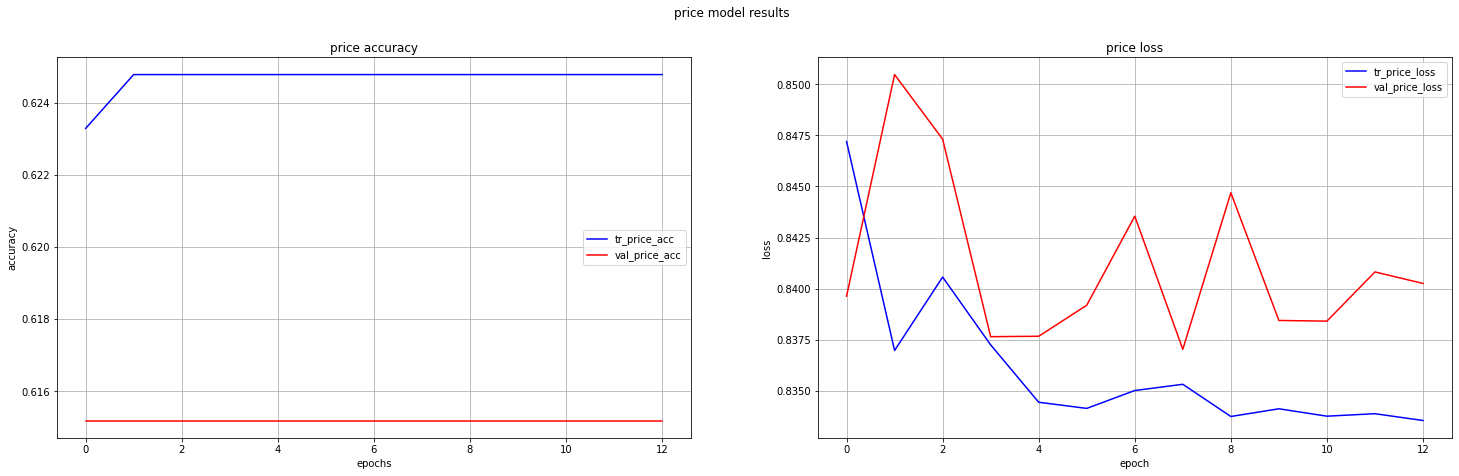

In [ ]:
train_val_loss_plt_price(history_FS_T3)

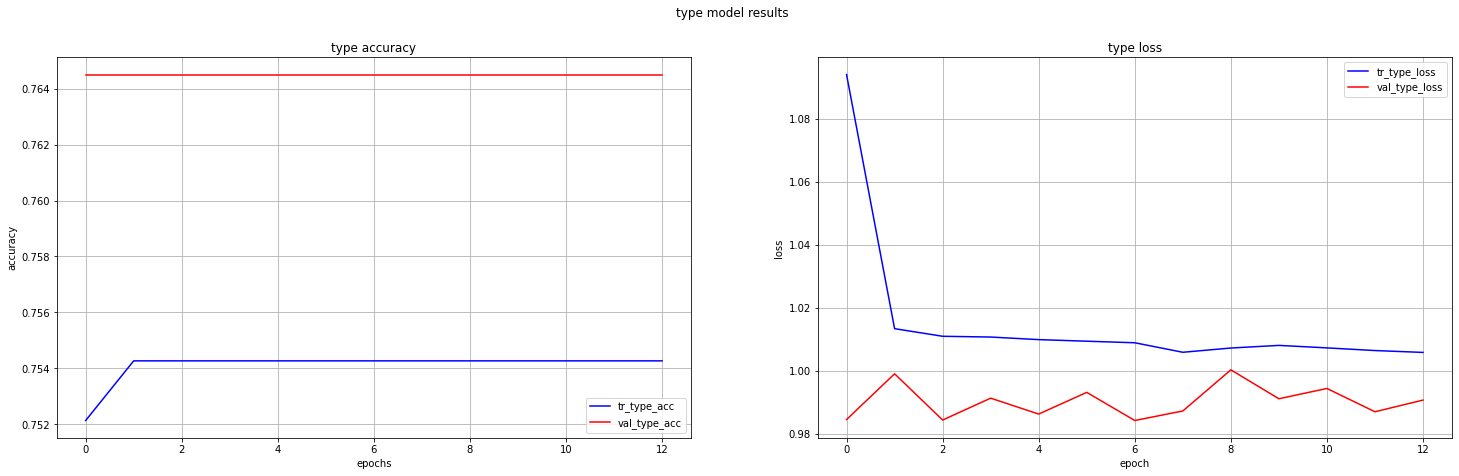

In [ ]:
train_val_loss_plt_type(history_FS_T3)

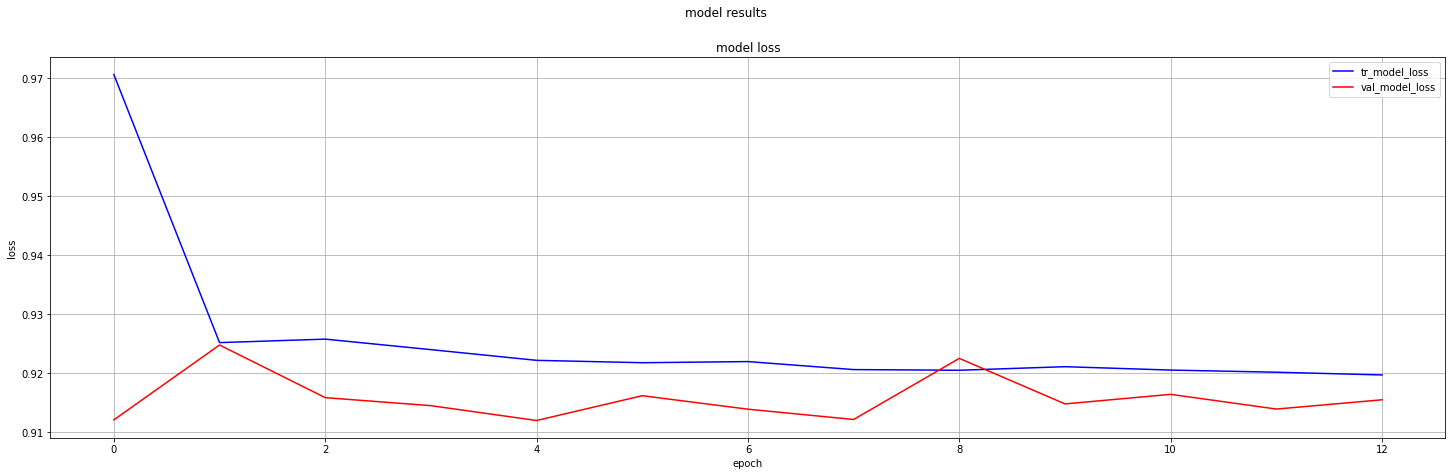

In [ ]:
train_val_loss_plt_model(history_FS_T3)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_FS,
        'image': x_val_image_FS},
  y= {'price': y_val_price_FS,
    'type':y_val_type_FS})
print("test loss, test acc:", res_eva)


46/46 [==============================] - 4s 96ms/step - loss: 0.9331 - price_loss: 0.8498 - type_loss: 1.0163 - price_sparse_categorical_accuracy: 0.6112 - type_sparse_categorical_accuracy: 0.7674
test loss, test acc: [0.9330673217773438, 0.8498415350914001, 1.0162936449050903, 0.6111869215965271, 0.7673942446708679]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_FS_k,
        'image': x_test_image_FS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 22s 94ms/step
[[0.61188143 0.3304567  0.05766193]
 [0.61188143 0.3304567  0.05766193]
 [0.61188143 0.3304567  0.05766193]
 ...
 [0.61188143 0.3304567  0.05766193]
 [0.61188143 0.3304567  0.05766192]
 [0.61188143 0.3304567  0.05766192]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_FS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_FS_T3.csv', index=False)


the score of evalution model in this trial is  [loss: 0.9341 - price_loss: 0.8497 - type_loss: 1.0185 - price_sparse_categorical_accuracy: 0.6112 - type_sparse_categorical_accuracy: 0.7674]

 the test score on the kaggle leaderboard is 0.63

###Trial_4

in this trial  i will add depth to image by adding conv2D Layer and maxpooling layers and use GRU layer for text




In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
gru = keras.layers.GRU(128, 
                       activation="tanh",
                       recurrent_activation="sigmoid",
                       return_sequences=True,
                       dropout=0.1,
                       recurrent_dropout=0.1)(embedded)
gru2 = keras.layers.GRU(64, 
                        activation="tanh",
                        recurrent_activation="sigmoid",
                        return_sequences=True,
                        dropout=0.1,
                        recurrent_dropout=0.1)(gru)
gru3 = keras.layers.GRU(32, 
                        activation="tanh",
                        recurrent_activation="sigmoid",
                        return_sequences=False,
                        dropout=0.1,
                        recurrent_dropout=0.1)(gru2)

# image part 
cov = Conv2D(32, (3, 3))(in_image) 
pl = MaxPool2D((3, 3))(cov) 
cov2 = Conv2D(32, (2,2))(pl) 
pl2 = MaxPool2D((2,2))(cov2)
flattened = Flatten()(pl2)


# fusion - combinig both
fused = tf.concat([gru3, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_45 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_44 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_20 (Conv2D)             (None, 62, 62, 32)   608         ['input_45[0][0]']               
                                                                                                  
 embedding_18 (Embedding)       (None, 100, 100)     4000000     ['input_44[0][0]']               
                                                                                           

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_FS,
        'image': x_train_image_FS
    },
    y={
        'type': y_train_type_FS,
        'price': y_train_price_FS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 136s 445ms/step - loss: 0.9723 - price_loss: 0.8480 - type_loss: 1.0966 - price_sparse_categorical_accuracy: 0.6231 - type_sparse_categorical_accuracy: 0.7519 - val_loss: 0.9324 - val_price_loss: 0.8489 - val_type_loss: 1.0159 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 2/15
293/293 [==============================] - 130s 445ms/step - loss: 0.9253 - price_loss: 0.8370 - type_loss: 1.0136 - price_sparse_categorical_accuracy: 0.6248 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.9154 - val_price_loss: 0.8406 - val_type_loss: 0.9902 - val_price_sparse_categorical_accuracy: 0.6152 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 3/15
293/293 [==============================] - 129s 439ms/step - loss: 0.9235 - price_loss: 0.8365 - type_loss: 1.0104 - price_sparse_categorical_accuracy: 0.6248 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.9230 - val_price_loss

In [ ]:
history_FS_T4=history

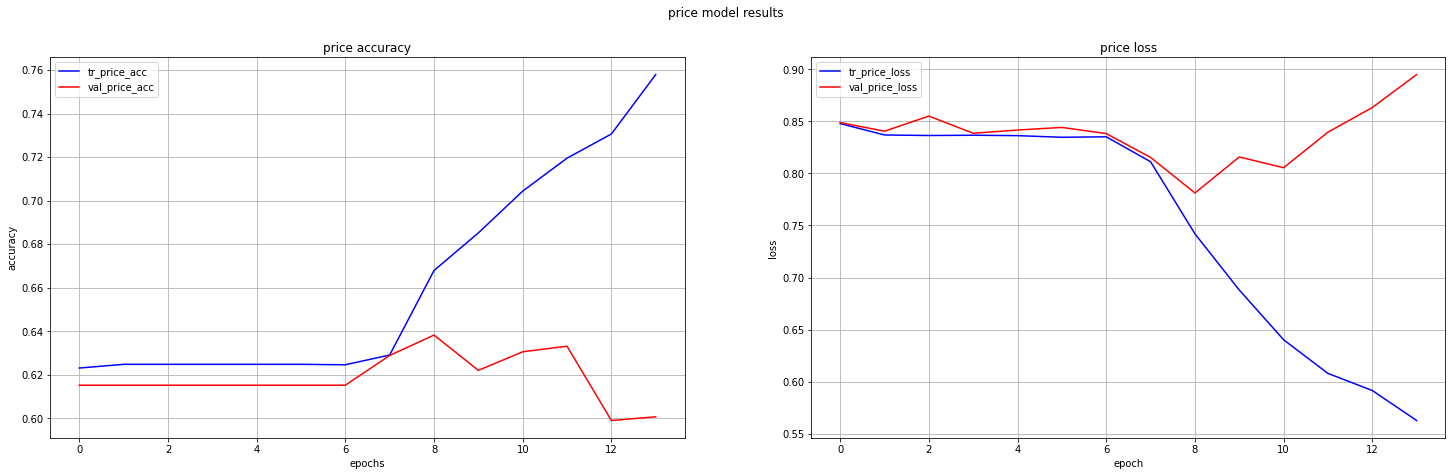

In [ ]:
train_val_loss_plt_price(history_FS_T4)

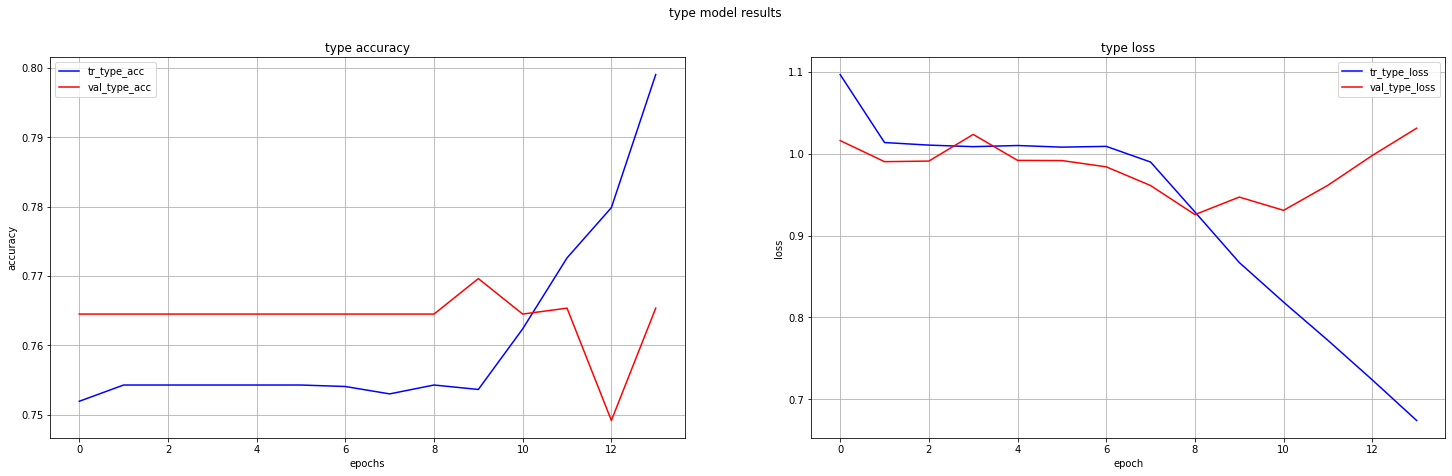

In [ ]:
train_val_loss_plt_type(history_FS_T4)

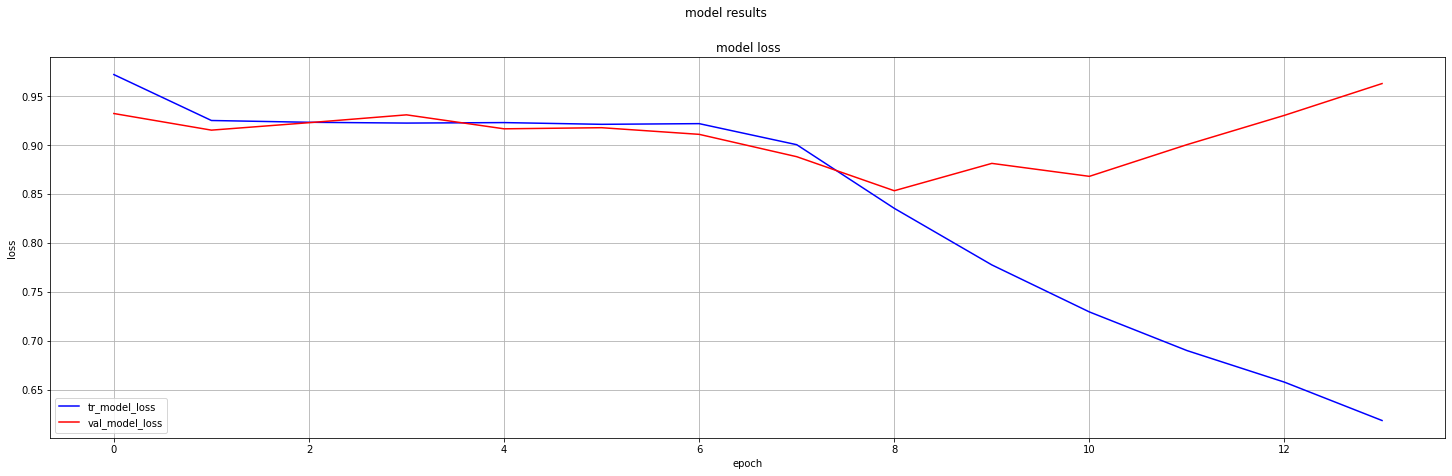

In [ ]:
train_val_loss_plt_model(history_FS_T4)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_FS,
        'image': x_val_image_FS},
  y= {'price': y_val_price_FS,
    'type':y_val_type_FS})
print("test loss, test acc:", res_eva)

46/46 [==============================] - 4s 86ms/step - loss: 0.8744 - price_loss: 0.7904 - type_loss: 0.9584 - price_sparse_categorical_accuracy: 0.6330 - type_sparse_categorical_accuracy: 0.7674
test loss, test acc: [0.8743894696235657, 0.7903591990470886, 0.9584195613861084, 0.6330150365829468, 0.7673942446708679]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_FS_k,
        'image': x_test_image_FS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 20s 83ms/step
[[0.5971047  0.36011803 0.04277714]
 [0.8507102  0.13662821 0.01266154]
 [0.8069891  0.17631984 0.01669104]
 ...
 [0.7762078  0.20364136 0.02015088]
 [0.74153054 0.23495515 0.02351429]
 [0.46606457 0.47174585 0.06218956]]
[0 0 0 ... 0 0 1]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_FS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_FS_T4.csv', index=False)


the score of evalution model in this trial is  [loss: 0.8917 - price_loss: 0.8032 - type_loss: 0.9801 - price_sparse_categorical_accuracy: 0.6392 - type_sparse_categorical_accuracy: 0.7674]

 the test score on the kaggle leaderboard is 0.66

###Trial_5

in this trial add Bidirectional RNN (LSTM)


In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# Bidirectional Layer:
# Bidirectional LSTMs are an extension of traditional LSTMs that can improve model
# performance on sequence classification problems.
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
bidirectional1 = keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=True))(embedded)
bidirectional2 = keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=True))(bidirectional1)
bidirectional3 = keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=False))(bidirectional2)


# image part 
cov = Conv2D(32, (3, 3))(in_image) 
pl = MaxPool2D((3, 3))(cov) 
cov2 = Conv2D(32, (2,2))(pl) 
pl2 = MaxPool2D((2,2))(cov2) 
flattened = Flatten()(pl2)


# fusion - combinig both
fused = tf.concat([bidirectional3, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_47 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_46 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_22 (Conv2D)             (None, 62, 62, 32)   608         ['input_47[0][0]']               
                                                                                                  
 embedding_19 (Embedding)       (None, 100, 100)     4000000     ['input_46[0][0]']               
                                                                                           

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_FS,
        'image': x_train_image_FS
    },
    y={
        'type': y_train_type_FS,
        'price': y_train_price_FS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=3,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 172s 548ms/step - loss: 0.9567 - price_loss: 0.8392 - type_loss: 1.0742 - price_sparse_categorical_accuracy: 0.6165 - type_sparse_categorical_accuracy: 0.7513 - val_loss: 0.8794 - val_price_loss: 0.8029 - val_type_loss: 0.9558 - val_price_sparse_categorical_accuracy: 0.6288 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 2/15
293/293 [==============================] - 160s 546ms/step - loss: 0.8506 - price_loss: 0.7359 - type_loss: 0.9654 - price_sparse_categorical_accuracy: 0.6732 - type_sparse_categorical_accuracy: 0.7545 - val_loss: 0.8663 - val_price_loss: 0.7710 - val_type_loss: 0.9616 - val_price_sparse_categorical_accuracy: 0.6493 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 3/15
293/293 [==============================] - 159s 544ms/step - loss: 0.7918 - price_loss: 0.6639 - type_loss: 0.9197 - price_sparse_categorical_accuracy: 0.7174 - type_sparse_categorical_accuracy: 0.7549 - val_loss: 0.8607 - val_price_loss

In [ ]:
history_FS_T5=history

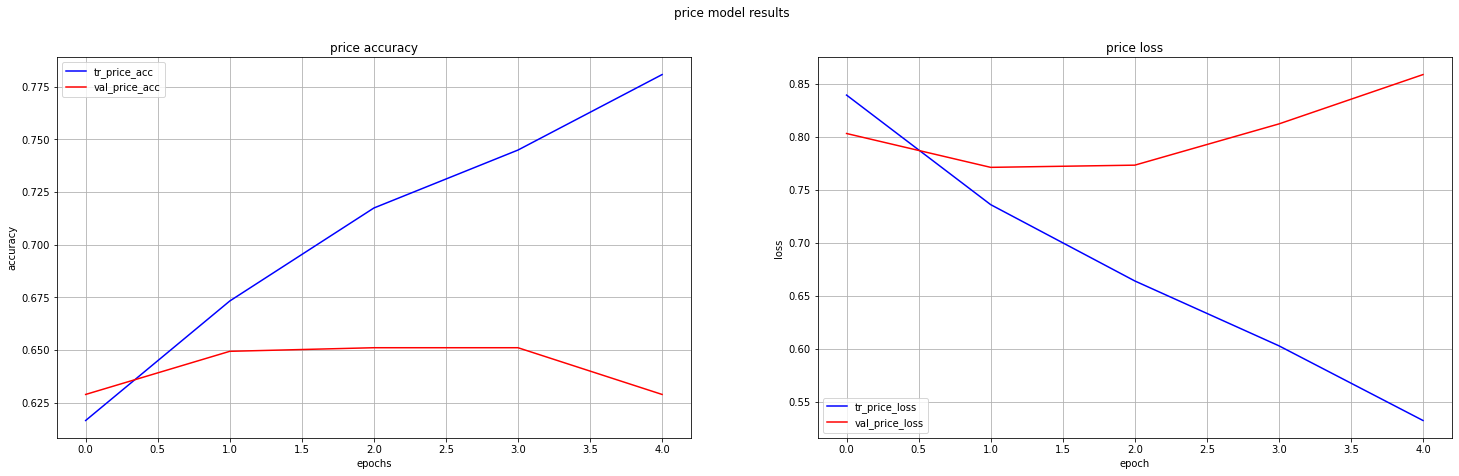

In [ ]:
train_val_loss_plt_price(history_FS_T5)

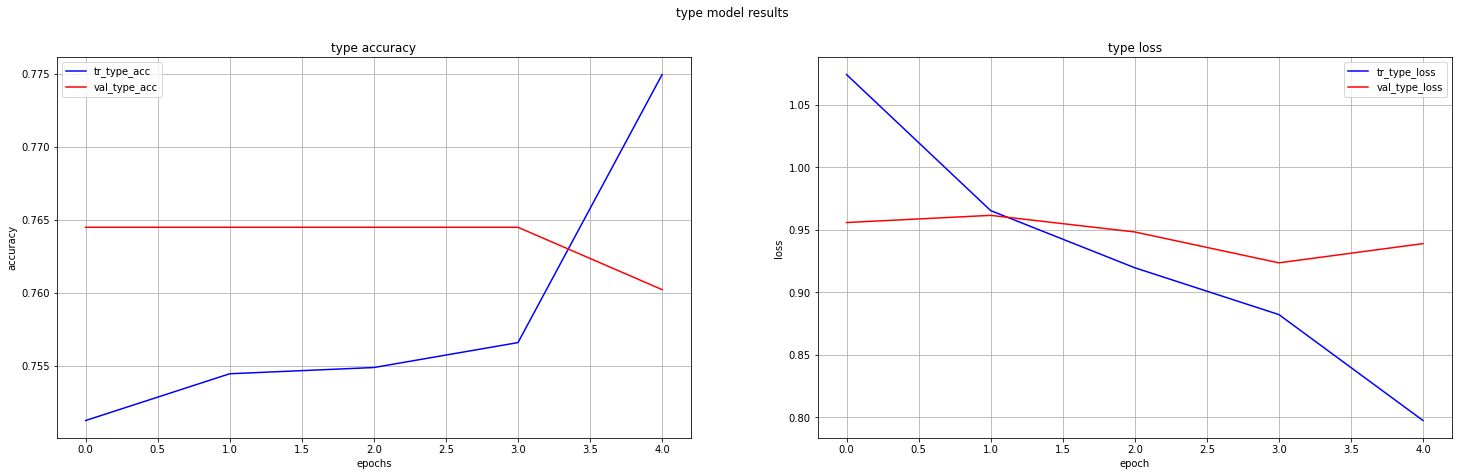

In [ ]:
train_val_loss_plt_type(history_FS_T5)

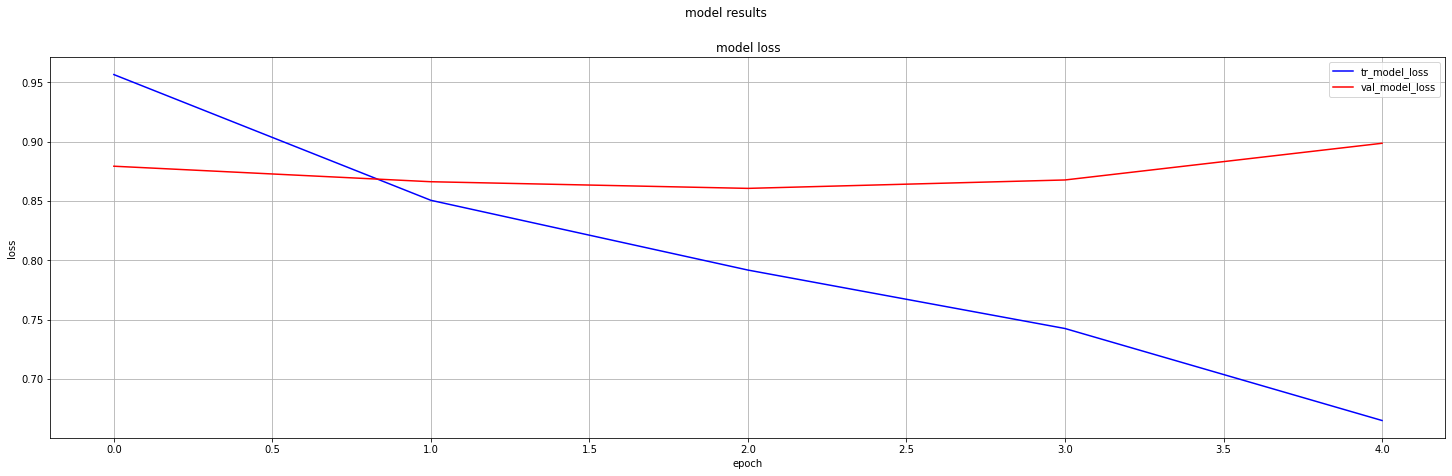

In [ ]:
train_val_loss_plt_model(history_FS_T5)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_FS,
        'image': x_val_image_FS},
  y= {'price': y_val_price_FS,
    'type':y_val_type_FS})
print("test loss, test acc:", res_eva)

46/46 [==============================] - 11s 238ms/step - loss: 0.8671 - price_loss: 0.7656 - type_loss: 0.9687 - price_sparse_categorical_accuracy: 0.6453 - type_sparse_categorical_accuracy: 0.7674
test loss, test acc: [0.8671233057975769, 0.7655568718910217, 0.9686898589134216, 0.6452932953834534, 0.7673942446708679]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_FS_k,
        'image': x_test_image_FS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 57s 236ms/step
[[0.7060609  0.25306964 0.0408694 ]
 [0.8713938  0.11228187 0.01632429]
 [0.6829224  0.27140263 0.04567498]
 ...
 [0.8070558  0.16740973 0.02553448]
 [0.84175867 0.13769478 0.02054643]
 [0.5455228  0.38811928 0.06635787]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_FS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_FS_T5.csv', index=False)

the score of evalution model is  [loss: 0.8657 - price_loss: 0.8127 - type_loss: 0.9187 - price_sparse_categorical_accuracy: 0.6248 - type_sparse_categorical_accuracy: 0.7640]

 the test score on the kaggle leaderboard is 0.65

###Trial_6 

Using Bidirectional RNN (LSTM)

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# Bidirectional Layer:
# performance on sequence classification problems.
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
bidirectional1 = keras.layers.Bidirectional(keras.layers.GRU(100, return_sequences=True,activation="tanh", recurrent_activation="sigmoid",dropout=0.1,recurrent_dropout=0.1))(embedded)
bidirectional2 = keras.layers.Bidirectional(keras.layers.GRU(100, return_sequences=True,activation="tanh", recurrent_activation="sigmoid",dropout=0.1,recurrent_dropout=0.1))(bidirectional1)
bidirectional3 = keras.layers.Bidirectional(keras.layers.GRU(100, return_sequences=False,activation="tanh", recurrent_activation="sigmoid",dropout=0.1,recurrent_dropout=0.1))(bidirectional2)

# image part 
cov = Conv2D(32, (3, 3))(in_image) 
pl = MaxPool2D((3, 3))(cov) 
cov2 = Conv2D(32, (2,2))(pl) 
pl2 = MaxPool2D((2,2))(cov2)
flattened = Flatten()(pl2) # flatten the shape 


# fusion - combinig both
fused = tf.concat([bidirectional3, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_49 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_48 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_24 (Conv2D)             (None, 62, 62, 32)   608         ['input_49[0][0]']               
                                                                                                  
 embedding_20 (Embedding)       (None, 100, 100)     4000000     ['input_48[0][0]']               
                                                                                           

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_FS,
        'image': x_train_image_FS
    },
    y={
        'type': y_train_type_FS,
        'price': y_train_price_FS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=3,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 368s 1s/step - loss: 0.9340 - price_loss: 0.8335 - type_loss: 1.0345 - price_sparse_categorical_accuracy: 0.6190 - type_sparse_categorical_accuracy: 0.7519 - val_loss: 0.8403 - val_price_loss: 0.7875 - val_type_loss: 0.8930 - val_price_sparse_categorical_accuracy: 0.6451 - val_type_sparse_categorical_accuracy: 0.7696
Epoch 2/15
293/293 [==============================] - 353s 1s/step - loss: 0.7707 - price_loss: 0.7355 - type_loss: 0.8060 - price_sparse_categorical_accuracy: 0.6694 - type_sparse_categorical_accuracy: 0.7797 - val_loss: 0.8098 - val_price_loss: 0.7796 - val_type_loss: 0.8401 - val_price_sparse_categorical_accuracy: 0.6527 - val_type_sparse_categorical_accuracy: 0.7739
Epoch 3/15
293/293 [==============================] - 350s 1s/step - loss: 0.6590 - price_loss: 0.6457 - type_loss: 0.6723 - price_sparse_categorical_accuracy: 0.7208 - type_sparse_categorical_accuracy: 0.8040 - val_loss: 0.8649 - val_price_loss: 0.8236 

In [ ]:
history_FS_T6=history

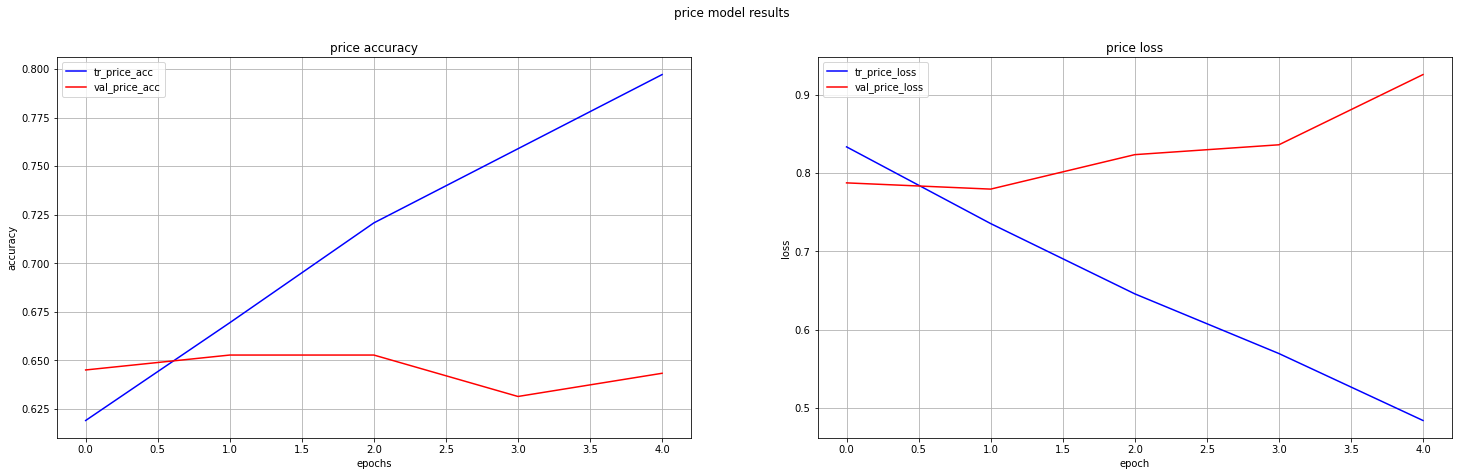

In [ ]:
train_val_loss_plt_price(history_FS_T6)

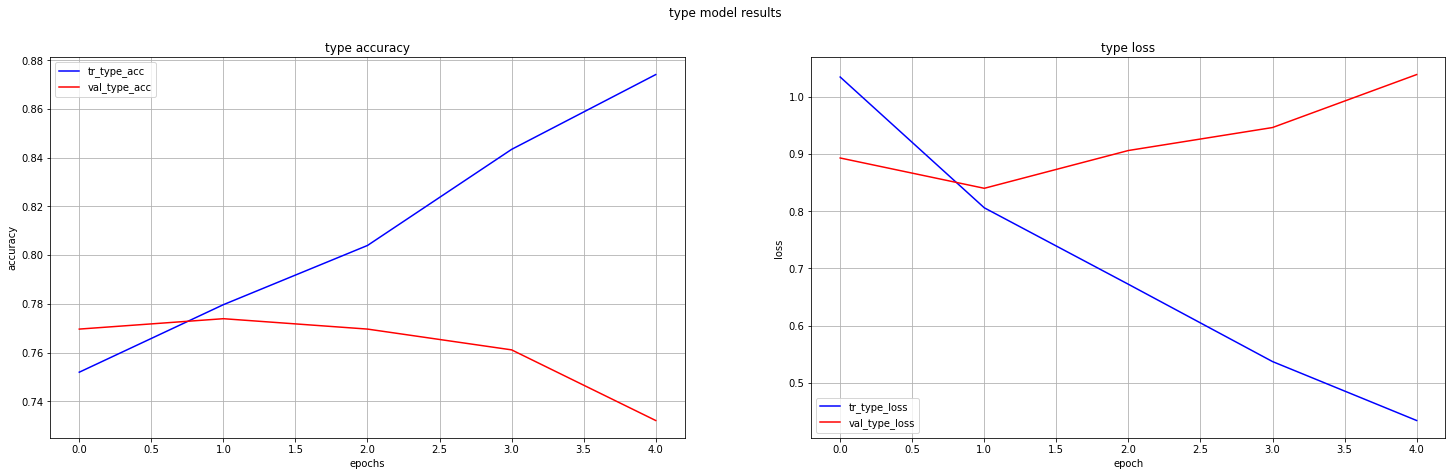

In [ ]:
train_val_loss_plt_type(history_FS_T6)

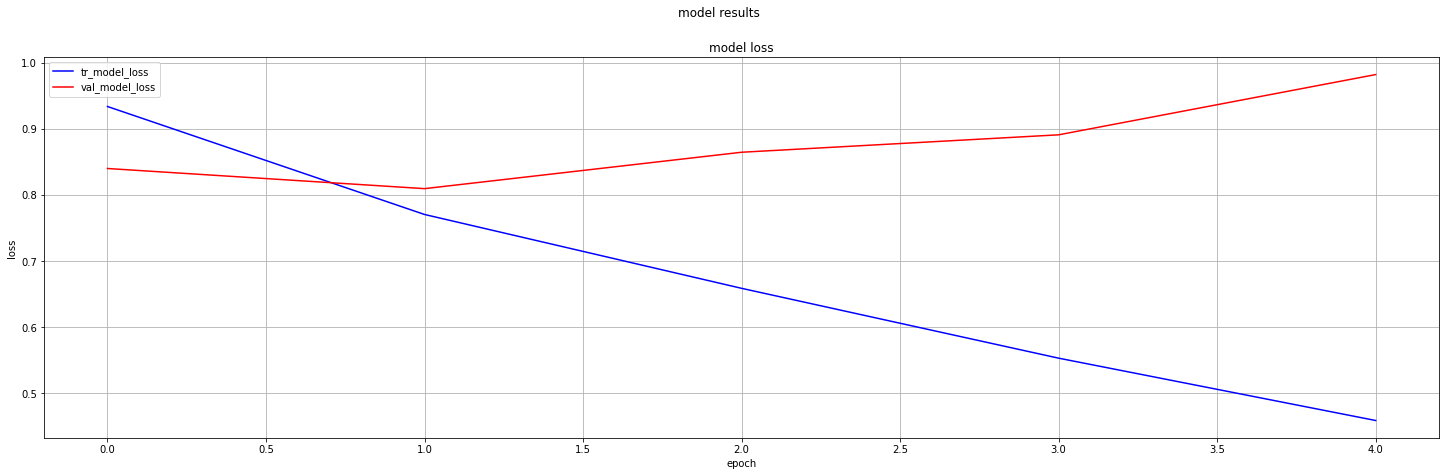

In [ ]:
train_val_loss_plt_model(history_FS_T6)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_FS,
        'image': x_val_image_FS},
  y= {'price': y_val_price_FS,
    'type':y_val_type_FS})
print("test loss, test acc:", res_eva)


46/46 [==============================] - 9s 193ms/step - loss: 0.8217 - price_loss: 0.7884 - type_loss: 0.8549 - price_sparse_categorical_accuracy: 0.6371 - type_sparse_categorical_accuracy: 0.7797
test loss, test acc: [0.8216525316238403, 0.788447380065918, 0.854857325553894, 0.637107789516449, 0.7796725630760193]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_FS_k,
        'image': x_test_image_FS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 48s 201ms/step
[[0.7025039  0.23518094 0.06231504]
 [0.9289058  0.06631446 0.00477978]
 [0.8140423  0.14447485 0.0414828 ]
 ...
 [0.80557865 0.16609238 0.02832893]
 [0.88259006 0.1022042  0.01520591]
 [0.7729958  0.19939983 0.02760418]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_FS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_FS_T6.csv', index=False)


the score of evalution model is  [loss: 0.8281 - price_loss: 0.7724 - type_loss: 0.8838 - price_sparse_categorical_accuracy: 0.6576 - type_sparse_categorical_accuracy: 0.7776]

 the test score on the kaggle leaderboard to 0.67

###Trial_7

in this trial Add drop-out regularization in the image component of the model to reduce the overfitting behaviour. Also using L2 recurrent regularization on the text component of the model.




In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
bi_lstm =  keras.layers.Bidirectional(keras.layers.GRU(20, recurrent_regularizer='l2'))(embedded) # adding quadratic regularizer

# image part
cov = Conv2D(32, (3, 3))(in_image) 
drop = Dropout(0.2)(cov) 
pl = MaxPool2D((3, 3))(drop)
cov2 = Conv2D(32, (2,2))(pl) 
drop2 = Dropout(0.2)(cov2) 
pl2 = MaxPool2D((2,2))(drop2) 
flattened = Flatten()(pl2) 

# fusion:
fused = tf.concat([bi_lstm, flattened], axis=-1) # concatenate text features with images

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_21"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_51 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_26 (Conv2D)             (None, 62, 62, 32)   608         ['input_51[0][0]']               
                                                                                                  
 dropout_9 (Dropout)            (None, 62, 62, 32)   0           ['conv2d_26[0][0]']              
                                                                                                  
 max_pooling2d_26 (MaxPooling2D  (None, 20, 20, 32)  0           ['dropout_9[0][0]']              
 )                                                                                         

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_FS,
        'image': x_train_image_FS
    },
    y={
        'type': y_train_type_FS,
        'price': y_train_price_FS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=3,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 47s 148ms/step - loss: 1.0805 - price_loss: 0.8395 - type_loss: 1.1024 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7513 - val_loss: 1.0370 - val_price_loss: 0.8349 - val_type_loss: 1.2074 - val_price_sparse_categorical_accuracy: 0.6169 - val_type_sparse_categorical_accuracy: 0.7645
Epoch 2/15
293/293 [==============================] - 43s 148ms/step - loss: 0.8440 - price_loss: 0.7620 - type_loss: 0.9039 - price_sparse_categorical_accuracy: 0.6457 - type_sparse_categorical_accuracy: 0.7549 - val_loss: 0.9095 - val_price_loss: 0.7761 - val_type_loss: 1.0217 - val_price_sparse_categorical_accuracy: 0.6442 - val_type_sparse_categorical_accuracy: 0.7637
Epoch 3/15
293/293 [==============================] - 42s 144ms/step - loss: 0.7613 - price_loss: 0.6874 - type_loss: 0.8074 - price_sparse_categorical_accuracy: 0.6941 - type_sparse_categorical_accuracy: 0.7698 - val_loss: 0.9069 - val_price_loss: 0

In [ ]:
history_FS_T7=history

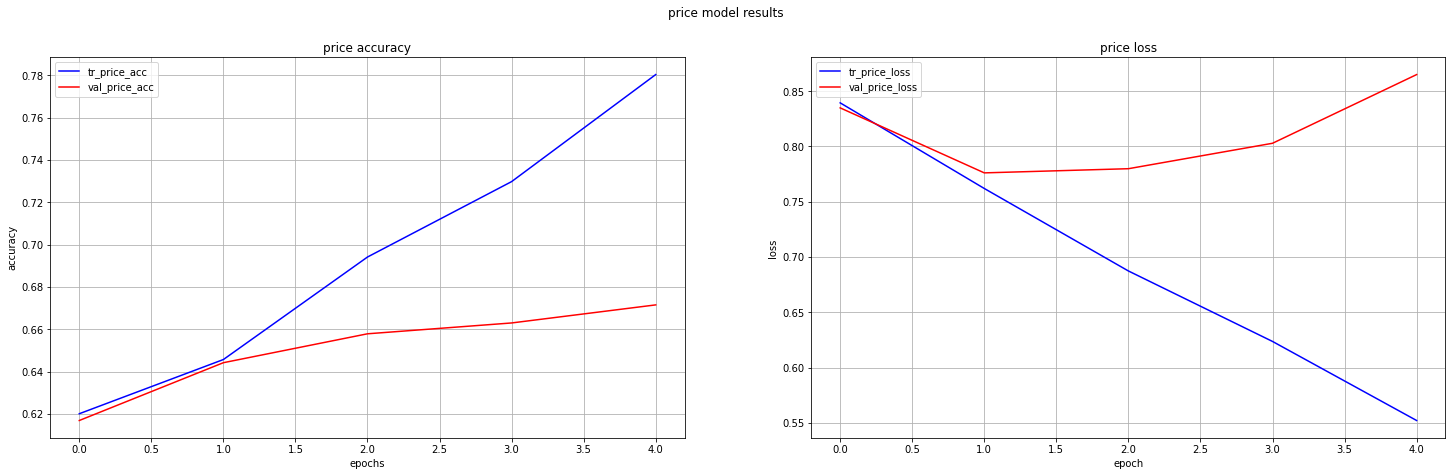

In [ ]:
train_val_loss_plt_price(history_FS_T7)

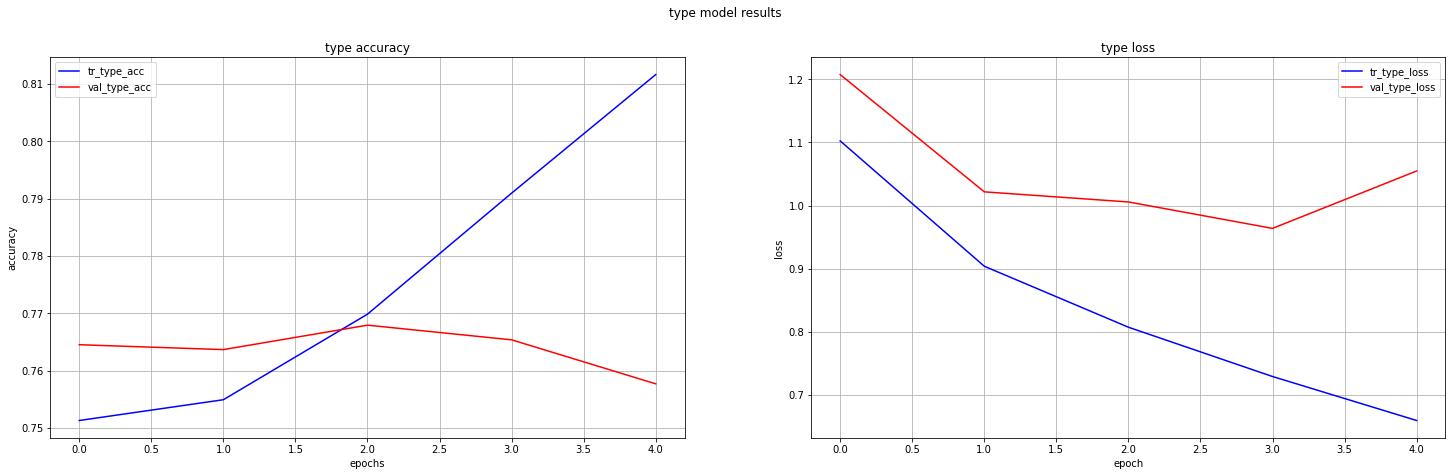

In [ ]:
train_val_loss_plt_type(history_FS_T7)

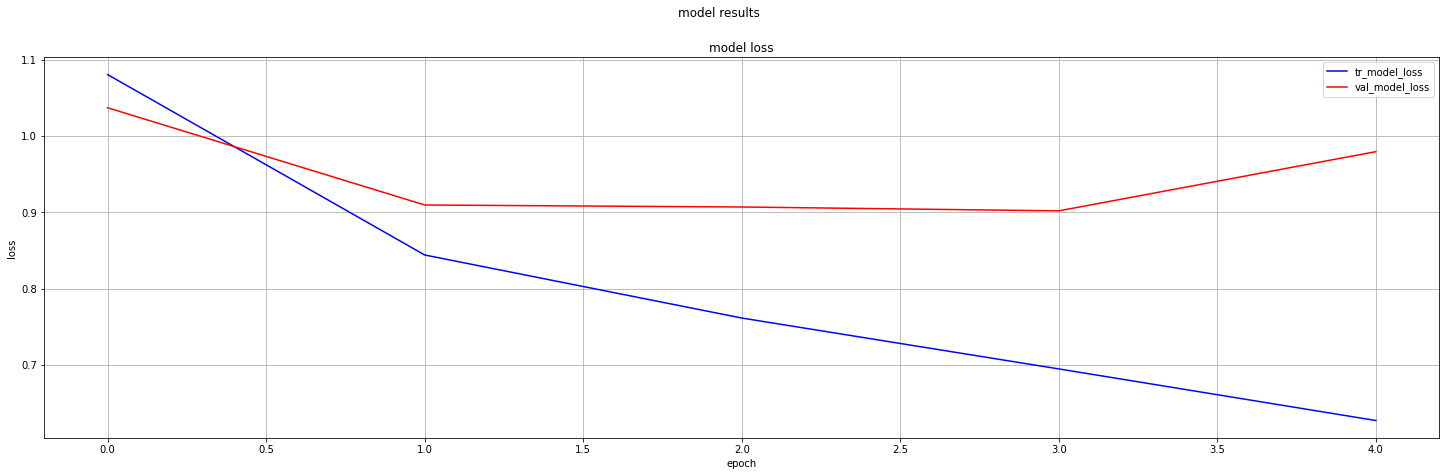

In [ ]:
train_val_loss_plt_model(history_FS_T7)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_FS,
        'image': x_val_image_FS},
  y= {'price': y_val_price_FS,
    'type':y_val_type_FS})
print("test loss, test acc:", res_eva)

46/46 [==============================] - 2s 41ms/step - loss: 0.9253 - price_loss: 0.7898 - type_loss: 1.0396 - price_sparse_categorical_accuracy: 0.6241 - type_sparse_categorical_accuracy: 0.7660
test loss, test acc: [0.9252738356590271, 0.789816677570343, 1.0395678281784058, 0.624147355556488, 0.7660300135612488]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_FS_k,
        'image': x_test_image_FS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 10s 39ms/step
[[0.35890004 0.5409929  0.10010699]
 [0.9082703  0.08388682 0.00784283]
 [0.8156539  0.1551036  0.02924254]
 ...
 [0.6389294  0.32754433 0.03352632]
 [0.73579586 0.23755099 0.0266531 ]
 [0.64632386 0.31268755 0.04098853]]
[1 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_FS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_FS_T7.csv', index=False)

the score of evalution model in this trial is  [loss: 0.8462 - price_loss: 0.7741 - type_loss: 0.8902 - price_sparse_categorical_accuracy: 0.6392 - type_sparse_categorical_accuracy: 0.7776]

 the test score on the kaggle leaderboard is 0.66

###Trial_8

in this trial use transfer learning with VGG16

In [ ]:
x_tr_image_FS=x_train_image_FS
x_vl_image_FS=x_val_image_FS

(5860, 64, 64, 3)
(1466, 64, 64, 3)


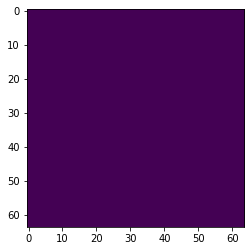

In [ ]:
from keras.applications.vgg16 import VGG16

# VGG needs input images with 3 channels, so I'll extend the training data to have 3 channels and appear RGB
# x_tr_image is currently (6101, 64, 64, 2)
rgb_tr_FS = x_tr_image_FS[:,:,:,0]
rgb_vl_FS = x_vl_image_FS[:,:,:,0]
# rgb.shape # now it's (6101, 64, 64)
plt.imshow(rgb_tr_FS[0, :, :]) # looks the same as it did before
rgb_tr_FS = np.repeat(rgb_tr_FS[..., np.newaxis], 3, -1) # repeat the same values across 3 channels
rgb_vl_FS = np.repeat(rgb_vl_FS[..., np.newaxis], 3, -1) # repeat the same values across 3 channels
print(rgb_tr_FS.shape) # now we have 487 samples of (6101, 64, 64, 3)
print(rgb_vl_FS.shape) # now we have 487 samples of (1526, 64, 64, 3)

In [ ]:
base = VGG16(include_top=False, input_shape=(64,64,3)) 
base.trainable = False # freezing the weights

In [ ]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 3)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
# averaged = tf.reduce_mean(embedded, axis=1) # compute the mean of the embeddings to reduce the rank of the embedding
attention = keras.layers.MultiHeadAttention(num_heads=2, key_dim=2)(embedded, embedded)
bi_lstm =  keras.layers.Bidirectional(keras.layers.GRU(50, recurrent_regularizer='l2'))(attention) # adding quadratic regularizer

# image part
scaling = keras.layers.Rescaling(1./127.5, offset=-1)(in_image) # rescaling to [-1,1] for VGG16
vgg = base(scaling, training=False) # pass the base model the scaled inputs
pl = keras.layers.GlobalAveragePooling2D()(vgg) # global average pooling, pretty much the same as flattening
do = Dropout(0.2)(pl) # dropout at a rate of 20%
fl = Flatten()(do) # flattening anyways


# fusion:
fused = tf.concat([bi_lstm, fl], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# model definition
bi_vgg_model = keras.Model(
      inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)

bi_vgg_model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 0.5,
        'type': 0.5,       
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)

bi_vgg_model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_41 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 rescaling_6 (Rescaling)        (None, 64, 64, 3)    0           ['input_41[0][0]']               
                                                                                                  
 input_40 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 vgg16 (Functional)             (None, 2, 2, 512)    14714688    ['rescaling_6[0][0]']            
                                                                                           

In [ ]:
history = bi_vgg_model.fit(
    x={
        'summary': x_train_summary_FS,
        'image': rgb_tr_FS
    },
    y={
        'type': y_train_type_FS,
        'price': y_train_price_FS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=3,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
293/293 [==============================] - 288s 970ms/step - loss: 1.1487 - price_loss: 0.8366 - type_loss: 1.1089 - price_sparse_categorical_accuracy: 0.6248 - type_sparse_categorical_accuracy: 0.7363 - val_loss: 0.8861 - val_price_loss: 0.8294 - val_type_loss: 0.9344 - val_price_sparse_categorical_accuracy: 0.6126 - val_type_sparse_categorical_accuracy: 0.7671
Epoch 2/15
293/293 [==============================] - 280s 957ms/step - loss: 0.8341 - price_loss: 0.7696 - type_loss: 0.8960 - price_sparse_categorical_accuracy: 0.6508 - type_sparse_categorical_accuracy: 0.7581 - val_loss: 0.8521 - val_price_loss: 0.7938 - val_type_loss: 0.9096 - val_price_sparse_categorical_accuracy: 0.6280 - val_type_sparse_categorical_accuracy: 0.7696
Epoch 3/15
293/293 [==============================] - 279s 953ms/step - loss: 0.7549 - price_loss: 0.7122 - type_loss: 0.7961 - price_sparse_categorical_accuracy: 0.6666 - type_sparse_categorical_accuracy: 0.7707 - val_loss: 0.8746 - val_price_loss

In [ ]:
history_FS_T8=history

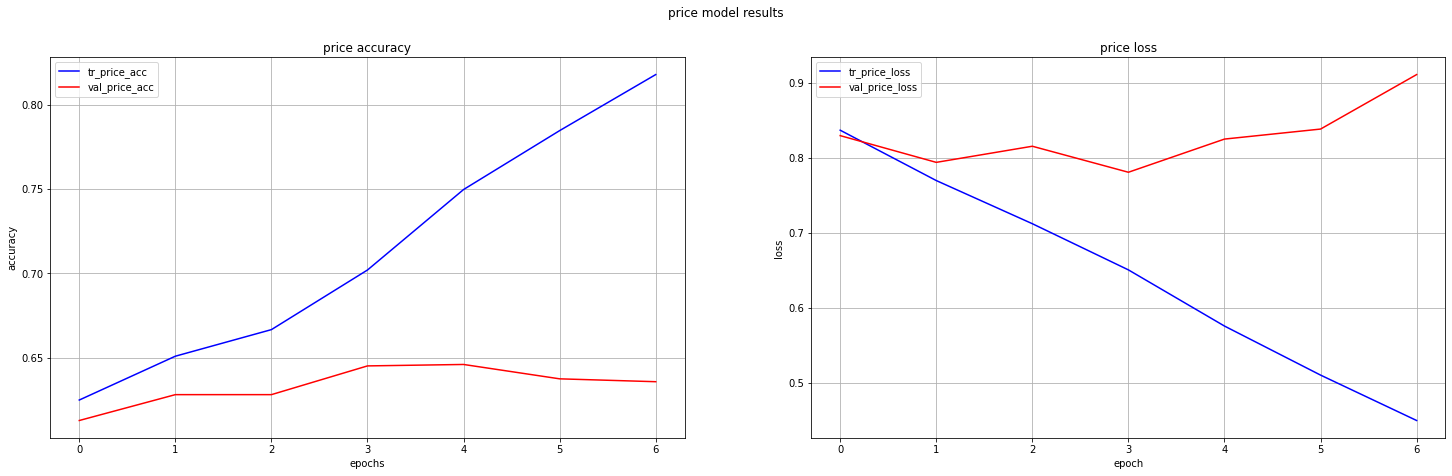

In [ ]:
train_val_loss_plt_price(history_FS_T8)

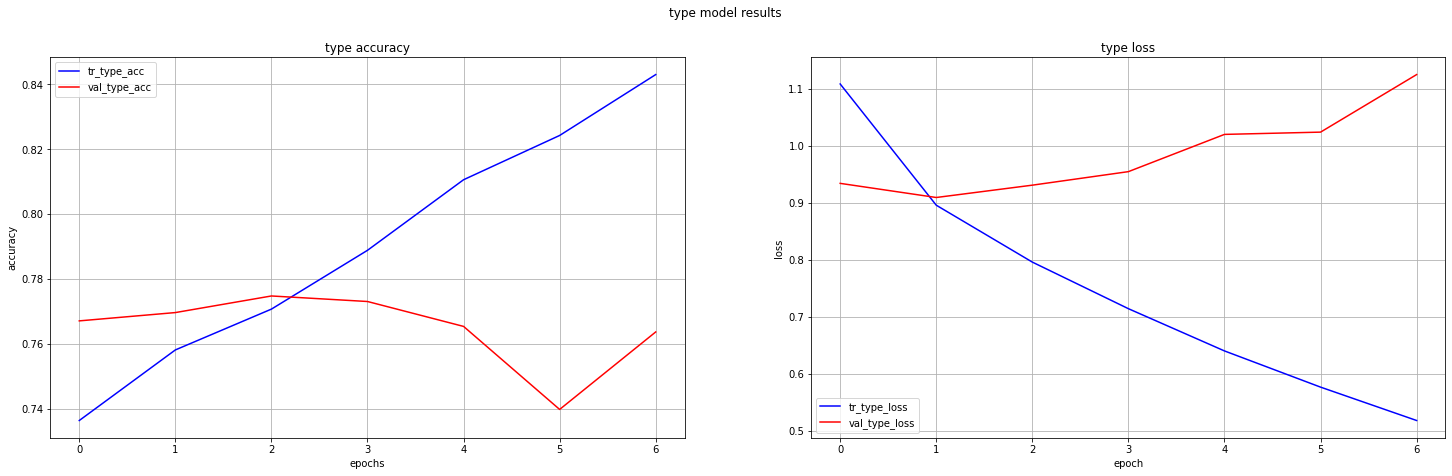

In [ ]:
train_val_loss_plt_type(history_FS_T8)

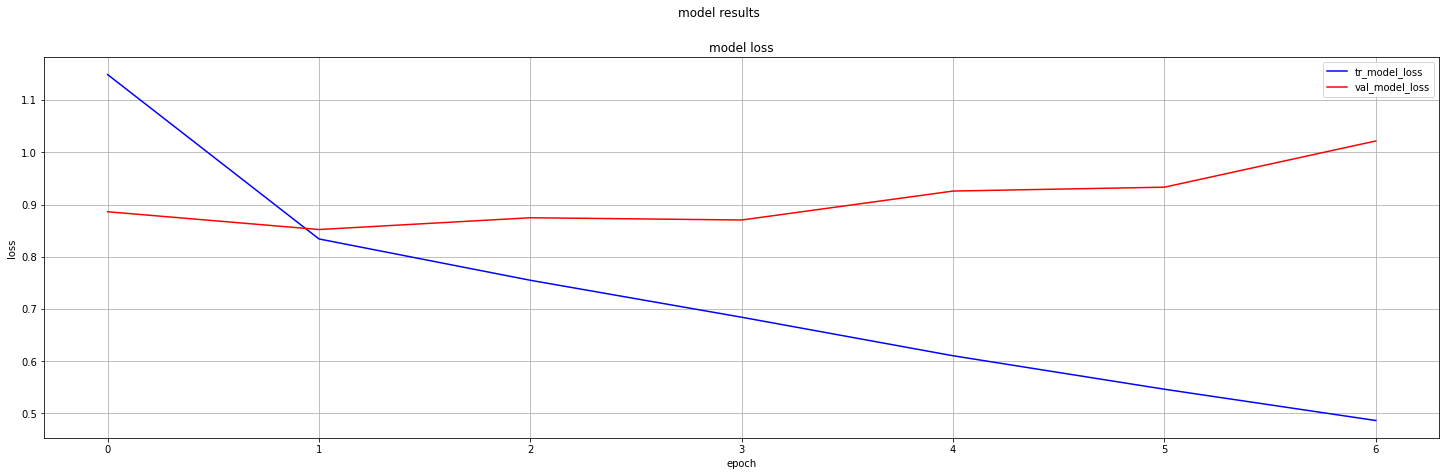

In [ ]:
train_val_loss_plt_model(history_FS_T8)

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_FS_k,
        'image': x_test_image_FS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_FS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_FS_T8.csv', index=False)



the score of evalution model is  [loss: 0.8462 - price_loss: 0.7741 - type_loss: 0.8902 - price_sparse_categorical_accuracy: 0.6392 - type_sparse_categorical_accuracy: 0.7776]

 the test score on the kaggle leaderboard is 0.66

##Second Solution

in this solution i will apply preprocessing method (resize image data, and detect the languages on text data and translate all languages to English language then cleaning text date then apply tokenization on text data and converting to integer IDs )

###Data preprocessing for Training data

In [ ]:
df_SS=pd.read_csv('a4/train_xy.csv')

In [ ]:
df_SS.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0


In [ ]:
df_SS.shape

(7627, 4)

In [ ]:
df_SS.isnull().sum()

summary    301
image        0
type         0
price        0
dtype: int64

In [ ]:
#drop the rows which have null values
df_SS.dropna(axis = 0, inplace = True)

In [ ]:
df_SS.isnull().sum()

summary    0
image      0
type       0
price      0
dtype: int64

In [ ]:
df_SS.shape

(7326, 4)

In [ ]:
#converting the type of "type" column to categorical and encode it 
df_SS['type_codes'] = df_SS.type.astype('category').cat.codes

#### preprocess image data

In [ ]:
import os
from tqdm.notebook import tqdm
from PIL import Image
from ast import literal_eval


In [ ]:
def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))
        arr = np.array(image)             
    except:
        arr = np.zeros((64, 64, 2))      
    return arr                            

In [ ]:
# loading images:
image_SS = np.array([load_image(i) for i in tqdm(df_SS.image)])

  0%|          | 0/7326 [00:00<?, ?it/s]

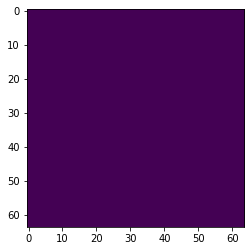

In [ ]:
# check image loading
import matplotlib.pyplot as plt
plt.imshow(image_SS[0, :, :, 0])

In [ ]:
#checking total shape of training data
np.shape(image_SS)

(7326, 64, 64, 2)

#### preprocess text data

In [ ]:
df_SS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7326 entries, 0 to 7626
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   summary     7326 non-null   object
 1   image       7326 non-null   object
 2   type        7326 non-null   object
 3   price       7326 non-null   int64 
 4   type_codes  7326 non-null   int8  
dtypes: int64(1), int8(1), object(3)
memory usage: 293.3+ KB


In [ ]:
df_SS['summary']=df_SS.summary.astype('str')

In [ ]:
df_SS['summary'].unique()

array(['Spacious, sunny and cozy modern apartment in the heart of Montreal. This 3 bedroom centrally located in the very popular Plateau Mont-royal neighborhood in the middle of prince-arthur pedestrian-only street. Close to all amenities ( Restaurants, coffee house, bars, clubs, shopping, universities, subway stations). Experience Montreal like a real local resident, be in the heart of the action: grand prix week, grill Saint-Laurent festival, mural 2019 and so much more!',
       'Located in one of the most vibrant and accessible locations of downtown Montreal, this one bedroom condo will not only impress you but leave you with one of the most memorable experiences. It is walking distance of the popular Sainte-Catherine Street, the Bell Center, the Old Port, Lachine Canal, Bonaventure metro, and much much more...',
       'Logement coquet et douillet à 10 minutes du centre-ville de Montréal. Épicerie, pharmacie, saq, restaurants et transports en communs à proximité. Deux chambres fer

"summary" column may be contain defferent language

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


langdetect is a simple python package developed by Michal Danilák that supports detection of 55 different languages out of the box (ISO 639-1 codes):

af, ar, bg, bn, ca, cs, cy, da, de, el, en, es, et, fa, fi, fr, gu, he,
hi, hr, hu, id, it, ja, kn, ko, lt, lv, mk, ml, mr, ne, nl, no, pa, pl,
pt, ro, ru, sk, sl, so, sq, sv, sw, ta, te, th, tl, tr, uk, ur, vi, zh-cn, zh-tw

In [ ]:
df_SS['summary']=df_SS.summary.str.lower()

In [ ]:
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [ ]:
from langdetect import detect


In [ ]:
#this function to detect languague for each row and return language detection for each row and other if language is not correct 
def detect_lang(x):
    try:
        language = detect(x)
    except:
        language = 'Other'
    return language

In [ ]:
df_SS['lang'] = df_SS["summary"].map(
    lambda x: detect_lang(x) if isinstance(x, str) else x
)

In [ ]:
#display the distribution of values of languages
df_SS['lang'].value_counts()

en       5237
fr       2059
zh-cn       9
es          5
ko          3
ro          3
no          2
af          2
ca          2
nl          1
da          1
it          1
pt          1
Name: lang, dtype: int64

In [ ]:
len(df_SS['lang'].value_counts())

13

translate all language to english 

In [ ]:
!pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()

In [ ]:
df_SS['summary_translated'] = df_SS["summary"].map(
    lambda x: (translator.translate(x,lang_tgt='en')).text if isinstance(x, str) else x
)


In [ ]:
df_SS['lang_translated'] = df_SS["summary_translated"].map(
    lambda x: detect(x) if isinstance(x, str) else x
)

In [ ]:
df_SS['lang_translated'].value_counts()

en    7300
fr      10
no       3
af       2
es       2
ro       2
ca       2
cy       1
da       1
it       1
tl       1
sv       1
Name: lang_translated, dtype: int64

In [ ]:
df_SS.head()

,summary,image,type,price,type_codes,lang,summary_translated,lang_translated
0,"spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1,1,en,"spacious, sunny and cozy modern apartment in t...",en
1,located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0,1,en,located in one of the most vibrant and accessi...,en
2,logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1,1,fr,pretty and cozy accommodation 10 minutes from ...,en
3,"beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1,1,en,"beautiful and spacious (1076 sc ft, / 100 mc) ...",en
4,très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0,1,fr,very large ''rustic'' apartment and very pleas...,en


In [ ]:
df_SS.shape

(7326, 8)

delete all rows these language is not english 

In [ ]:
df_SS = df_SS[df_SS.lang_translated == "en"]


In [ ]:
df_SS.shape

(7300, 8)

In [ ]:
df_SS["summary_translated"]

0       spacious, sunny and cozy modern apartment in t...
1       located in one of the most vibrant and accessi...
2       pretty and cozy accommodation 10 minutes from ...
3       beautiful and spacious (1076 sc ft, / 100 mc) ...
4       very large ''rustic'' apartment and very pleas...
                              ...                        
7622    a large 4 and 1/2 apartment, all inclusive, we...
7623    magnificent condo directly on the river. you w...
7624    this apartment is perfect for anyone visiting ...
7625    it is a cozy ,clean ,and comfortable apartment...
7626    modern country style (newly-renovated); open c...
Name: summary_translated, Length: 7300, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk 


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    #RE_TWOCHARACTER=re.compile(r"\b[A-Za-zÀ-ž]\b{2}", re.IGNORECASE)
    #RE_URL=re.compile(r'^https?:\/\/.*[\r\n]*', re.IGNORECASE)

    #remove any html tags (< /br> often found)
    text = re.sub(RE_TAGS, " ", text)
    #Keep only ASCII + European Chars and whitespace, no digits
    text = re.sub(RE_ASCII, " ", text)
    #remove single letter chars
    text = re.sub(RE_SINGLECHAR, " ", text)
     #remove two letter chars
    #text = re.sub(RE_TWOCHARACTER, " ", text)
    #remove URL 
    #text = re.sub(RE_URL, " ", text)
    #convert all whitespaces (tabs etc.) to single wspace
    text = re.sub(RE_WSPACE, " ", text)
    #remove any digit
    text=re.sub(r'\d+', '', text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]
      # (tdf-idf):
      # remove stopwords, punctuation and stemm
    words_filtered = [
      stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]
    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Clean text
df_SS["summary_clean"] = df_SS.loc[df_SS["summary_translated"].str.len() > 0, "summary_translated"]
df_SS["summary_clean"] = df_SS["summary_clean"].map(
    lambda x: clean_text(x) if isinstance(x, str) else x
)

In [ ]:
df_SS.head()

,summary,image,type,price,type_codes,lang,summary_translated,lang_translated,summary_clean
0,"spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1,1,en,"spacious, sunny and cozy modern apartment in t...",en,spacious sunni cozi modern apart heart montrea...
1,located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0,1,en,located in one of the most vibrant and accessi...,en,locat one vibrant access locat downtown montre...
2,logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1,1,fr,pretty and cozy accommodation 10 minutes from ...,en,pretti cozi accommod minut downtown montreal g...
3,"beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1,1,en,"beautiful and spacious (1076 sc ft, / 100 mc) ...",en,beauti spacious sc ft mc condo th floor west i...
4,très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0,1,fr,very large ''rustic'' apartment and very pleas...,en,larg rustic apart pleasant live rent nice neig...


In [ ]:
df_SS.shape

(7300, 9)

In [ ]:
# Drop when any of x missing
df_SS = df_SS[(df_SS["summary_clean"] != "") & (df_SS["summary_clean"] != "null")]

df_SS = df_SS.dropna(
    axis="index", subset=[ "summary_translated", "summary_clean"]
).reset_index(drop=True)

In [ ]:
df_SS.shape

(7300, 9)

###split data

In [ ]:
from sklearn.model_selection import train_test_split
# split data (training/testing set)
df_train_SS, df_val_SS = train_test_split(df_SS, test_size=0.2, random_state=10)

In [ ]:
# loading overview: (force convert some of the non-string cell to string)
x_train_text_SS = df_train_SS.summary_clean.astype('str')
# loading images:
x_train_image_SS = np.array([load_image(i) for i in tqdm(df_train_SS.image)])

# get type
y_train_type_SS = df_train_SS.type_codes

# get price
y_train_price_SS = df_train_SS.price

  0%|          | 0/5840 [00:00<?, ?it/s]

In [ ]:
print("x_train_text_SS.shape >>>> ",x_train_text_SS.shape)
print("x_train_image_SS.shape >>>> ",x_train_image_SS.shape)
print("y_train_type_SS.shape >>>> ",y_train_type_SS.shape)
print("y_train_price_SS.shape >>>> ",y_train_price_SS.shape)

x_train_text_SS.shape >>>>  (5840,)
x_train_image_SS.shape >>>>  (5840, 64, 64, 2)
y_train_type_SS.shape >>>>  (5840,)
y_train_price_SS.shape >>>>  (5840,)


In [ ]:
# loading overview: (force convert some of the non-string cell to string)
x_val_text_SS = df_val_SS.summary_clean.astype('str')
# loading images:
x_val_image_SS = np.array([load_image(i) for i in tqdm(df_val_SS.image)])

# get type
y_val_type_SS = df_val_SS.type_codes

# get price
y_val_price_SS = df_val_SS.price

  0%|          | 0/1460 [00:00<?, ?it/s]

In [ ]:
print("x_val_text_SS.shape >>>> ",x_val_text_SS.shape)
print("x_val_image_SS.shape >>>> ",x_val_image_SS.shape)
print("y_val_type_SS.shape >>>> ",y_val_type_SS.shape)
print("y_val_price_SS.shape >>>> ",y_val_price_SS.shape)

x_val_text_SS.shape >>>>  (1460,)
x_val_image_SS.shape >>>>  (1460, 64, 64, 2)
y_val_type_SS.shape >>>>  (1460,)
y_val_price_SS.shape >>>>  (1460,)


In [ ]:
df_train_SS["price"].value_counts()

0    3606
1    1864
2     370
Name: price, dtype: int64

In [ ]:
df_train_SS["type"].value_counts()

Apartment             4429
Condominium            528
House                  291
Loft                   247
Townhouse              138
Serviced apartment      55
Bed and breakfast       24
Guest suite             22
Bungalow                21
Hostel                  21
Guesthouse              12
Aparthotel              11
Cottage                 11
Boutique hotel           9
Other                    8
Villa                    3
Tiny house               3
Camper/RV                2
Cabin                    2
Boat                     1
Castle                   1
Hotel                    1
Name: type, dtype: int64

###preprocessing (cont)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint

vocab_size = 40000
max_len = 100


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_text_SS)


In [ ]:
def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
    )
 

In [ ]:
# padding is done inside: 
x_train_summary_SS = _preprocess(x_train_text_SS)

In [ ]:
print(x_train_summary_SS.shape)

(5840, 100)


In [ ]:
# we can use the tokenizer to convert IDs to words.
pprint(tokenizer.sequences_to_texts(x_train_summary_SS[:5]))

['charm apart locat near olymp site dispos necessari equip great stay montreal '
 'perfect place coupl friend solo travel busi travel',
 'apart perfect anyon visit citi locat eclect neighbourhood st henri min walk '
 'metro min downtown min walk trendi restaur bar fill notr dame street min '
 'walk iga groceri store',
 'hi look roommat clean gentl calm room fournish desk bed closset big window '
 'beauti hous fournish kitchen dish wash dri machin dinnigroom meter metro '
 'jolicoeur avail',
 'cosi apart close everi montreal activ well furnish nice bright make feel '
 'confort stay two block away mont royal park enjoy plateau mile end walk '
 'apart away bus station drive downtown',
 'cozi lumin perfect coupl trio would great even two coupl one block metro '
 'station supermarket within walk distanc min tourist area jean talon market '
 'littl itali mile end surround good qualiti restaur cool micro breweri bar '
 'block year long beauti park jarri']


In [ ]:
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 40000


In [ ]:
#apply _preprocess function on summary
x_val_summary_SS = _preprocess(x_val_text_SS)


In [ ]:
print(x_val_summary_SS.shape)

(1460, 100)


###preprocessing for test data (Kaggle)

In [ ]:
df_test_SS_K=pd.read_csv('a4/test_x.csv')

In [ ]:
df_test_SS_K.head()

,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg


In [ ]:
df_test_SS_K.shape

(7360, 3)

In [ ]:
df_test_SS_K['summary']=df_test_SS_K.summary.astype('str')

In [ ]:
df_test_SS_K['summary']=df_test_SS_K.summary.str.lower()

In [ ]:
df_test_SS_K['lang'] = df_test_SS_K["summary"].apply(detect_lang)

In [ ]:
#display the distribution of values
df_test_SS_K['lang'].value_counts()

en       5253
fr       2072
zh-cn      10
es          6
af          3
ca          2
pt          2
ro          2
ko          2
it          2
et          1
nl          1
sk          1
lv          1
id          1
Other       1
Name: lang, dtype: int64

In [ ]:
len(df_test_SS_K['lang'].value_counts())

16

In [ ]:
df_test_SS_K['summary_translated'] = df_test_SS_K["summary"].map(
    lambda x: (translator.translate(x,lang_tgt='en')).text if isinstance(x, str) else x
)


In [ ]:
df_test_SS_K['lang_translated'] = df_test_SS_K["summary_translated"].apply(detect_lang)

In [ ]:
df_test_SS_K['lang_translated'].value_counts()

en       7336
fr          8
ro          3
af          3
pt          2
ca          2
it          2
et          1
sk          1
nl          1
Other       1
Name: lang_translated, dtype: int64

In [ ]:
df_test_SS_K.head()

,id,summary,image,lang,summary_translated,lang_translated
0,0,charming warm house is ready to host you here ...,img_test/0.jpg,en,charming warm house is ready to host you here ...,en
1,1,"la chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg,fr,"the room is spacious and bright, in an apartme...",en
2,2,grande chambre confortable située au sous-sol ...,img_test/2.jpg,fr,large comfortable room located in the basement...,en
3,3,"près d’un métro, ligne orange. 10 minutes à pi...",img_test/3.jpg,fr,"near a metro, orange line. 10 minutes walking....",en
4,4,very bright appartment and very cosy. 2 separa...,img_test/4.jpg,en,very bright appartment and very cosy. 2 separa...,en


In [ ]:
df_test_SS_K.shape

(7360, 6)

In [ ]:
df_test_SS_K["summary_translated"]

0       charming warm house is ready to host you here ...
1       the room is spacious and bright, in an apartme...
2       large comfortable room located in the basement...
3       near a metro, orange line. 10 minutes walking....
4       very bright appartment and very cosy. 2 separa...
                              ...                        
7355    large, fully-furnished flat with brick walls a...
7356    accommodation located at the top of a duplex. ...
7357    my place is close to parks, . my place is good...
7358    *** for security reasons, i will prioritize gu...
7359    stay in an amazing area of montreal! 5-7 min f...
Name: summary_translated, Length: 7360, dtype: object

In [ ]:
# Clean text
df_test_SS_K["summary_clean"] = df_test_SS_K.loc[df_test_SS_K["summary_translated"].str.len() > 0, "summary_translated"]
df_test_SS_K["summary_clean"] = df_test_SS_K["summary_clean"].map(
    lambda x: clean_text(x) if isinstance(x, str) else x
)

In [ ]:
df_test_SS_K.head()

,id,summary,image,lang,summary_translated,lang_translated,summary_clean
0,0,charming warm house is ready to host you here ...,img_test/0.jpg,en,charming warm house is ready to host you here ...,en,charm warm hous readi host multi cultur parc e...
1,1,"la chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg,fr,"the room is spacious and bright, in an apartme...",en,room spacious bright apart share three roommat
2,2,grande chambre confortable située au sous-sol ...,img_test/2.jpg,fr,large comfortable room located in the basement...,en,larg comfort room locat basement hous larg bat...
3,3,"près d’un métro, ligne orange. 10 minutes à pi...",img_test/3.jpg,fr,"near a metro, orange line. 10 minutes walking....",en,near metro orang line minut walk ahunts reside...
4,4,very bright appartment and very cosy. 2 separa...,img_test/4.jpg,en,very bright appartment and very cosy. 2 separa...,en,bright appart cosi separ bedroom queen size do...


In [ ]:
df_test_SS_K.shape

(7360, 7)

In [ ]:
#apply _preprocess function on summary
x_test_summary_SS_k = _preprocess(df_test_SS_K["summary_clean"])


In [ ]:
print(x_test_summary_SS_k.shape)

(7360, 100)


In [ ]:
#apply the load_image method on test images 
x_test_image_SS_k = np.array([load_image(i) for i in tqdm(df_test_SS_K.image)])

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
x_test_image_SS_k.shape

(7360, 64, 64, 2)

##trials

In [ ]:
def train_val_loss_plt_price(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
  fig.suptitle('price model results')
  # first we display the training price accuracy in red color VS. the validation price accuracy in blue color through the epochs
  ax1.plot(history.history['price_sparse_categorical_accuracy'], 'b')
  ax1.plot(history.history['val_price_sparse_categorical_accuracy'], 'r')
  ax1.set_title('price accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epochs')
  ax1.legend(['tr_price_acc', 'val_price_acc'])
  ax1.grid()
  # on this axis, we plot the price training loss in red color VS. the price validation loss in blue color through the epochs
  ax2.plot(history.history['price_loss'], 'b')
  ax2.plot(history.history['val_price_loss'], 'r')
  ax2.set_title('price loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['tr_price_loss', 'val_price_loss'])
  ax2.grid()
  plt.show()

In [ ]:
def train_val_loss_plt_type(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
  fig.suptitle('type model results')
  # first we display the training price accuracy in red color VS. the validation price accuracy in blue color through the epochs
  ax1.plot(history.history['type_sparse_categorical_accuracy'], 'b')
  ax1.plot(history.history['val_type_sparse_categorical_accuracy'], 'r')
  ax1.set_title('type accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epochs')
  ax1.legend(['tr_type_acc', 'val_type_acc'])
  ax1.grid()
  # on this axis, we plot the price training loss in red color VS. the price validation loss in blue color through the epochs
  ax2.plot(history.history['type_loss'], 'b')
  ax2.plot(history.history['val_type_loss'], 'r')
  ax2.set_title('type loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['tr_type_loss', 'val_type_loss'])
  ax2.grid()
  plt.show()

In [ ]:
def train_val_loss_plt_model(history):

  fig, (ax1) = plt.subplots(1, 1, figsize=(25,7))
  fig.suptitle('model results')
  ax1.plot(history.history['loss'], 'b')
  ax1.plot(history.history['val_loss'], 'r')
  ax1.set_title('model loss')
  ax1.set_ylabel('loss')
  ax1.set_xlabel('epoch')
  ax1.legend(['tr_model_loss', 'val_model_loss'])
  ax1.grid()
  plt.show()

In [ ]:
len_price = len(df_SS.price.unique())
len_price

3

In [ ]:
len_type = len(df_SS.type.unique())
len_type

24

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D,SpatialDropout1D,Dropout
from keras.layers import SimpleRNN
from tensorflow.keras.optimizers import Adam

###Trial_1

in this trial, for text part i will use average of embedding and for image part i will use simple conv2d

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)

# image part 
cov = Conv2D(32, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_SS,
        'image': x_train_image_SS
    },
    y={
        'type': y_train_type_SS,
        'price': y_train_price_SS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
292/292 [==============================] - 58s 196ms/step - loss: 1.0717 - price_loss: 0.8553 - type_loss: 1.2881 - price_sparse_categorical_accuracy: 0.6224 - type_sparse_categorical_accuracy: 0.7549 - val_loss: 0.9155 - val_price_loss: 0.8334 - val_type_loss: 0.9977 - val_price_sparse_categorical_accuracy: 0.5976 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 2/15
292/292 [==============================] - 56s 193ms/step - loss: 0.9030 - price_loss: 0.8139 - type_loss: 0.9920 - price_sparse_categorical_accuracy: 0.6233 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.8943 - val_price_loss: 0.8080 - val_type_loss: 0.9806 - val_price_sparse_categorical_accuracy: 0.6104 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 3/15
292/292 [==============================] - 56s 193ms/step - loss: 0.8708 - price_loss: 0.7714 - type_loss: 0.9702 - price_sparse_categorical_accuracy: 0.6466 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.8622 - val_price_loss: 0

In [ ]:
history_SS_T1=history

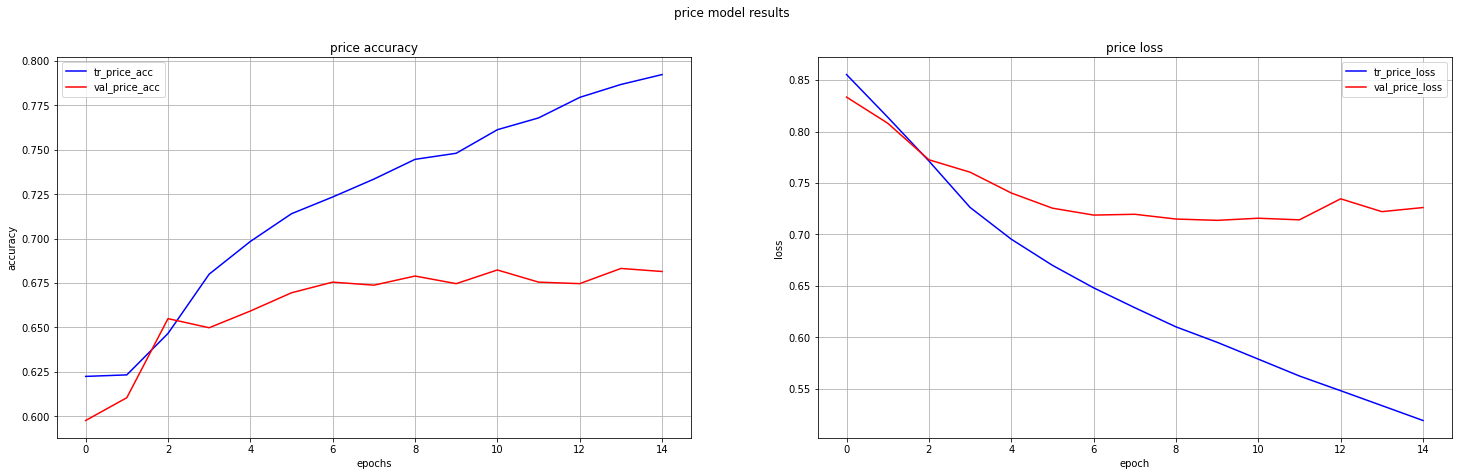

In [ ]:
train_val_loss_plt_price(history_SS_T1)

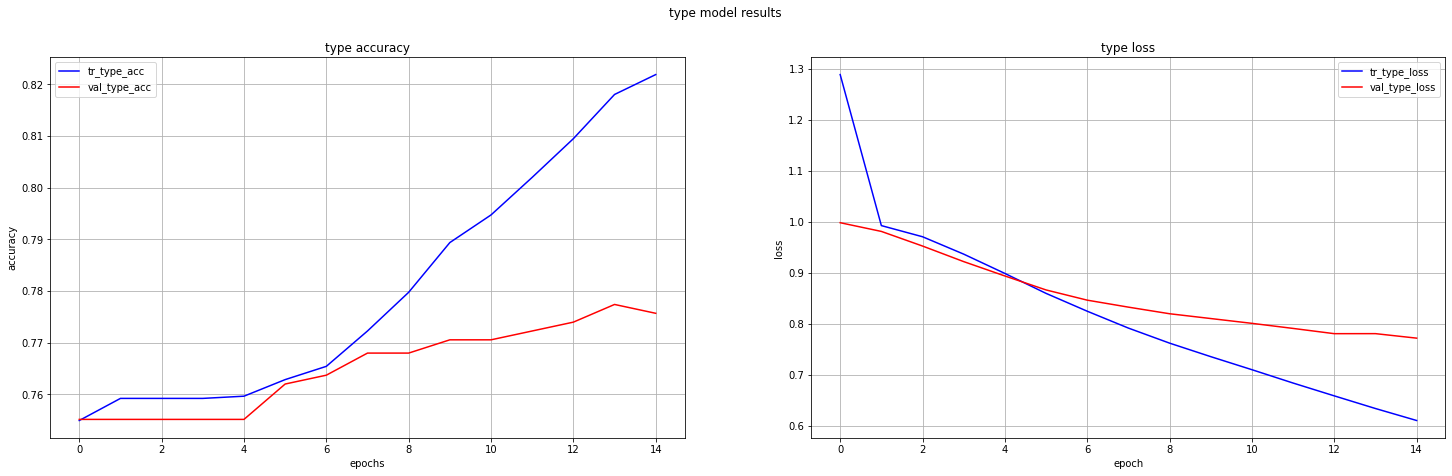

In [ ]:
train_val_loss_plt_type(history_SS_T1)

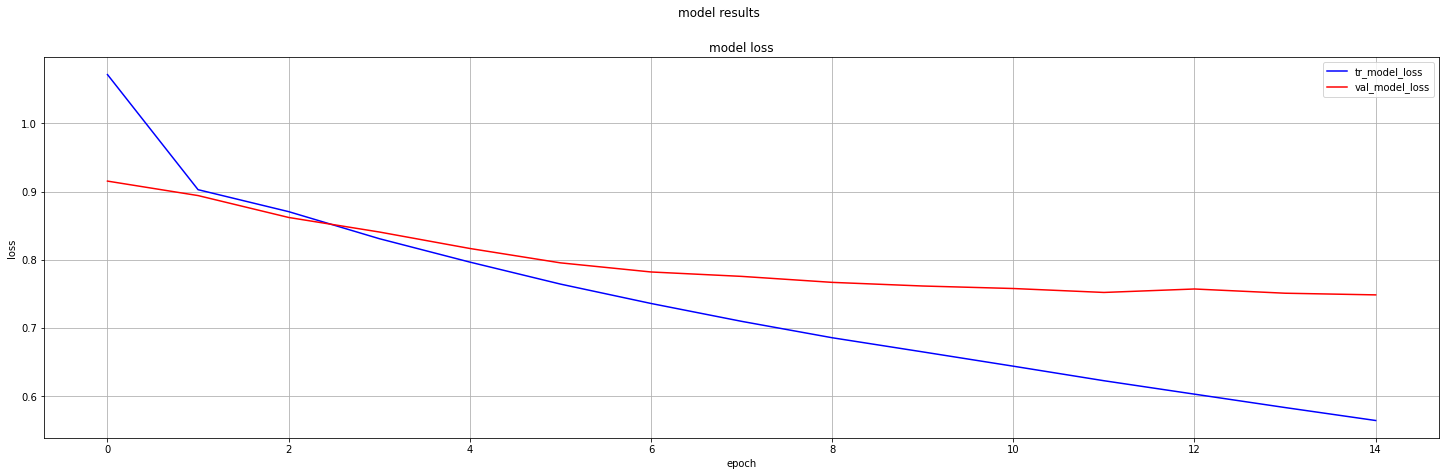

In [ ]:
train_val_loss_plt_model(history_SS_T1)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_SS,
        'image': x_val_image_SS},
  y= {'price': y_val_price_SS,
    'type':y_val_type_SS})
print("test loss, test acc:", res_eva)


46/46 [==============================] - 4s 72ms/step - loss: 0.7736 - price_loss: 0.7194 - type_loss: 0.8277 - price_sparse_categorical_accuracy: 0.6719 - type_sparse_categorical_accuracy: 0.7726
test loss, test acc: [0.7735655307769775, 0.7194116115570068, 0.8277193307876587, 0.6719177961349487, 0.7726027369499207]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_SS_k,
        'image': x_test_image_SS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 16s 71ms/step
[[0.7884747  0.16190208 0.04962321]
 [0.94091696 0.04914566 0.00993739]
 [0.79765934 0.14939317 0.05294737]
 ...
 [0.7558907  0.20676103 0.03734832]
 [0.94136876 0.04390299 0.01472819]
 [0.6263427  0.31933513 0.05432216]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_SS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_SS_T1.csv', index=False)


the score of evalution model in this trial is  [loss: 0.7736 - price_loss: 0.7194 - type_loss: 0.8277 - price_sparse_categorical_accuracy: 0.6719 - type_sparse_categorical_accuracy: 0.7726 ]

 the test score on the kaggle leaderboard is 0.682

###Trial_2

in this trial  i will add depth to image by adding conv2D Layer and maxpooling layers and use SimpleRNN after embedded layer for text




In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. you can change it to anything else as needed
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
#SpatialDropout1D layer
l1 = SpatialDropout1D(0.2)(embedded)
#Simple RNN Layer
SimpleRNN_lay = SimpleRNN(32, dropout=0.5,recurrent_regularizer='l2')(l1)

# image part 
cov = Conv2D(32, (3, 3))(in_image) 
pl = MaxPool2D((3, 3))(cov) 
cov2 = Conv2D(32, (2,2))(pl)
pl2 = MaxPool2D((2,2))(cov2) 
flattened = Flatten()(pl2) # flatten the shape 


# fusion - combinig both
fused = tf.concat([SimpleRNN_lay, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 62, 62, 32)   608         ['input_6[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 20, 20, 32)  0           ['conv2d_3[0][0]']               
                                                                                            

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_SS,
        'image': x_train_image_SS
    },
    y={
        'type': y_train_type_SS,
        'price': y_train_price_SS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
292/292 [==============================] - 46s 153ms/step - loss: 1.1151 - price_loss: 0.8542 - type_loss: 1.0976 - price_sparse_categorical_accuracy: 0.6220 - type_sparse_categorical_accuracy: 0.7528 - val_loss: 0.9696 - val_price_loss: 0.8516 - val_type_loss: 1.0170 - val_price_sparse_categorical_accuracy: 0.5976 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 2/15
292/292 [==============================] - 33s 114ms/step - loss: 0.9427 - price_loss: 0.8421 - type_loss: 1.0175 - price_sparse_categorical_accuracy: 0.6224 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9302 - val_price_loss: 0.8425 - val_type_loss: 1.0127 - val_price_sparse_categorical_accuracy: 0.5976 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 3/15
292/292 [==============================] - 29s 100ms/step - loss: 0.9295 - price_loss: 0.8409 - type_loss: 1.0164 - price_sparse_categorical_accuracy: 0.6224 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9282 - val_price_loss: 0

In [ ]:
history_SS_T2=history

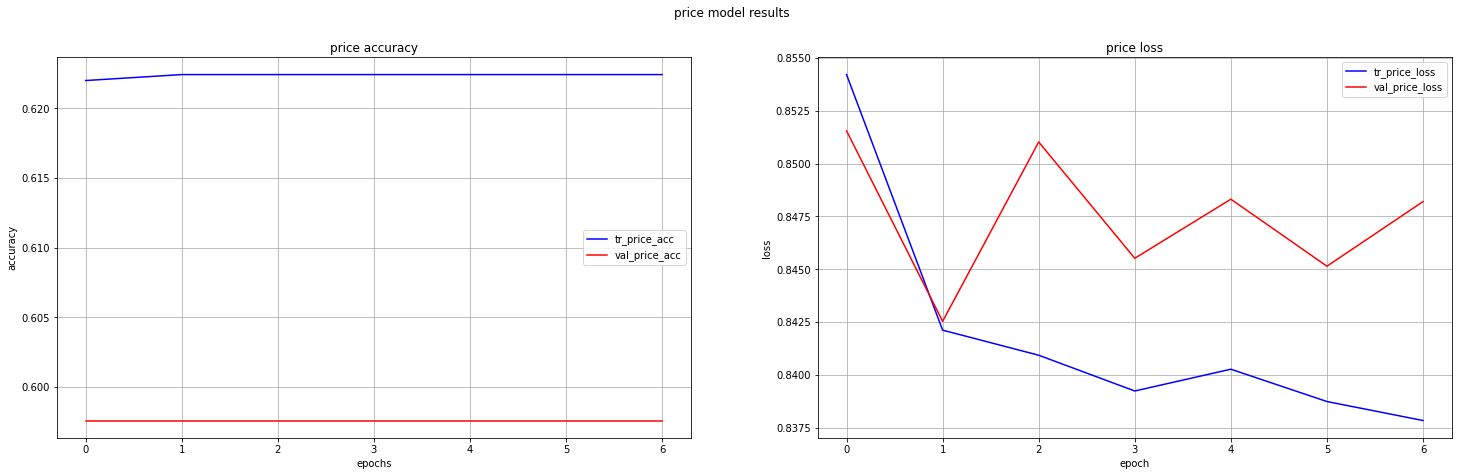

In [ ]:
train_val_loss_plt_price(history_SS_T2)

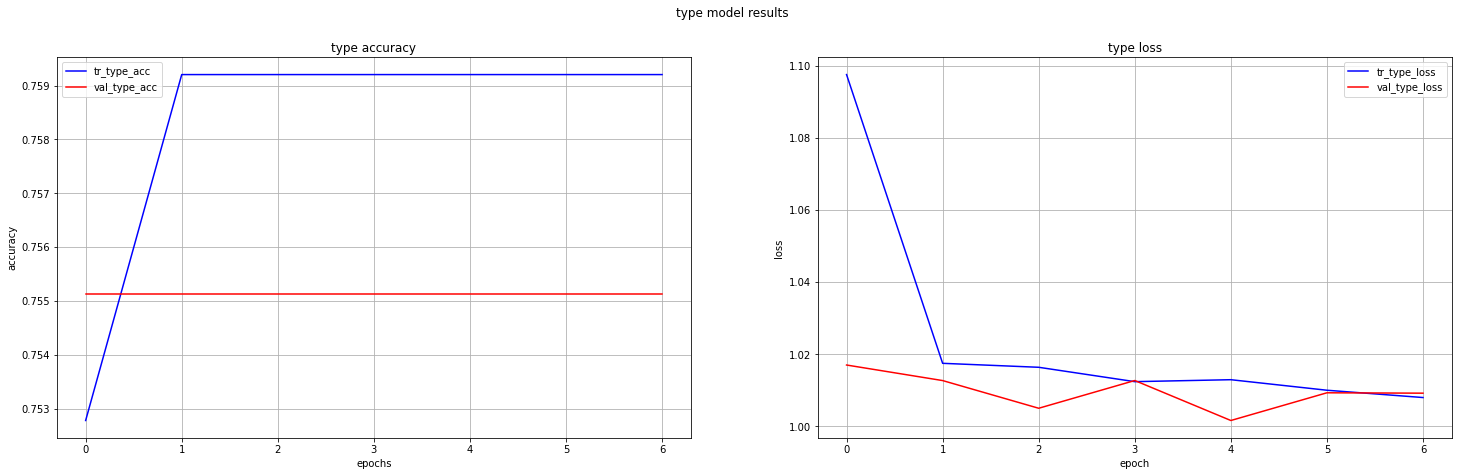

In [ ]:
train_val_loss_plt_type(history_SS_T2)

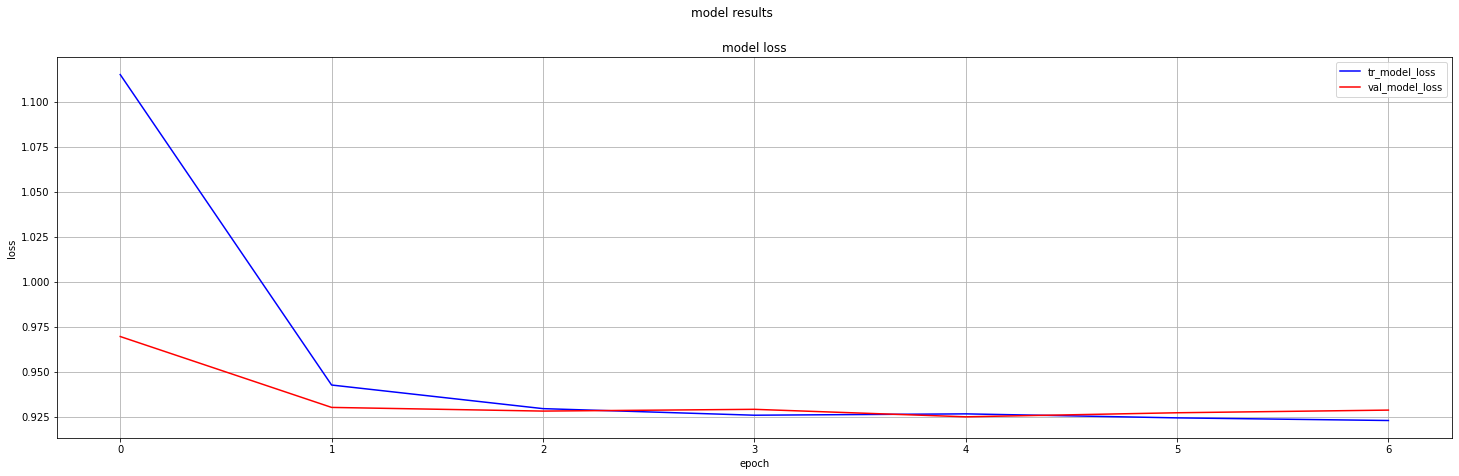

In [ ]:
train_val_loss_plt_model(history_SS_T2)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_SS,
        'image': x_val_image_SS},
  y= {'price': y_val_price_SS,
    'type':y_val_type_SS})
print("test loss, test acc:", res_eva)


46/46 [==============================] - 2s 32ms/step - loss: 0.9284 - price_loss: 0.8364 - type_loss: 1.0151 - price_sparse_categorical_accuracy: 0.6322 - type_sparse_categorical_accuracy: 0.7562
test loss, test acc: [0.9283725619316101, 0.8364387154579163, 1.0150961875915527, 0.6321917772293091, 0.7561643719673157]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_SS_k,
        'image': x_test_image_SS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 15s 65ms/step
[[0.5907194  0.3417488  0.06753176]
 [0.5907194  0.3417488  0.06753176]
 [0.5907194  0.3417488  0.06753176]
 ...
 [0.5907194  0.3417488  0.06753176]
 [0.5907194  0.34174877 0.06753176]
 [0.5907194  0.34174877 0.06753176]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_SS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_SS_T2.csv', index=False)


the score of evalution model in this trial is  [loss: 0.9284 - price_loss: 0.8364 - type_loss: 1.0151 - price_sparse_categorical_accuracy: 0.6322 - type_sparse_categorical_accuracy: 0.7562]

 the test score on the kaggle leaderboard is  0.63

###Trial_3

in this trial  i will add depth to image by adding conv2D Layer and maxpooling layers and use LSTM layer for text




In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
lstm = keras.layers.LSTM(128, 
                         activation="tanh",
                         recurrent_activation="sigmoid",
                         return_sequences=True,
                         dropout=0.1,
                         recurrent_dropout=0.1)(embedded)
lstm2 = keras.layers.LSTM(64, 
                         activation="tanh",
                         recurrent_activation="sigmoid",
                         return_sequences=True,
                         dropout=0.1,
                         recurrent_dropout=0.1)(lstm)
lstm3 = keras.layers.LSTM(32, 
                         activation="tanh",
                         recurrent_activation="sigmoid",
                         return_sequences=False,
                         dropout=0.1,
                         recurrent_dropout=0.1)(lstm2)

# image part 
cov = Conv2D(32, (3, 3))(in_image) 
pl = MaxPool2D((3, 3))(cov) 
cov2 = Conv2D(32, (2,2))(pl) 
pl2 = MaxPool2D((2,2))(cov2) 
flattened = Flatten()(pl2) # flatten the shape


# fusion - combinig both
fused = tf.concat([lstm3, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 62, 62, 32)   608         ['input_8[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 100, 100)     4000000     ['input_7[0][0]']                
                                                                                            

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_SS,
        'image': x_train_image_SS
    },
    y={
        'type': y_train_type_SS,
        'price': y_train_price_SS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
292/292 [==============================] - 194s 645ms/step - loss: 0.9767 - price_loss: 0.8482 - type_loss: 1.1051 - price_sparse_categorical_accuracy: 0.6173 - type_sparse_categorical_accuracy: 0.7562 - val_loss: 0.9247 - val_price_loss: 0.8422 - val_type_loss: 1.0071 - val_price_sparse_categorical_accuracy: 0.5976 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 2/15
292/292 [==============================] - 175s 598ms/step - loss: 0.9291 - price_loss: 0.8415 - type_loss: 1.0167 - price_sparse_categorical_accuracy: 0.6224 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9296 - val_price_loss: 0.8509 - val_type_loss: 1.0084 - val_price_sparse_categorical_accuracy: 0.5976 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 3/15
292/292 [==============================] - 186s 636ms/step - loss: 0.9274 - price_loss: 0.8412 - type_loss: 1.0136 - price_sparse_categorical_accuracy: 0.6224 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9347 - val_price_loss

In [ ]:
history_SS_T3=history

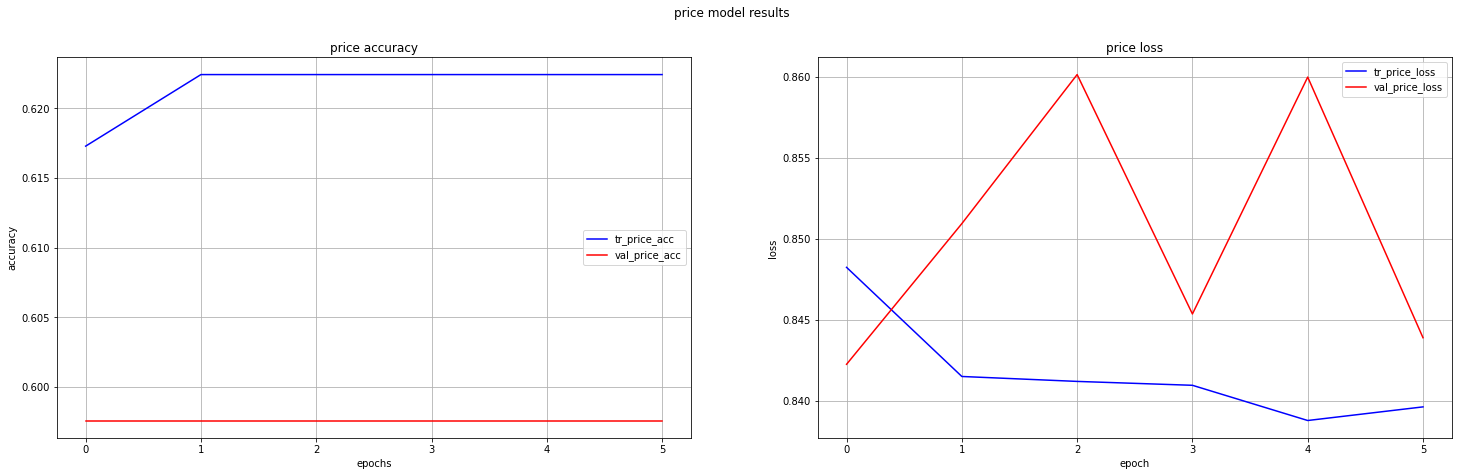

In [ ]:
train_val_loss_plt_price(history_SS_T3)

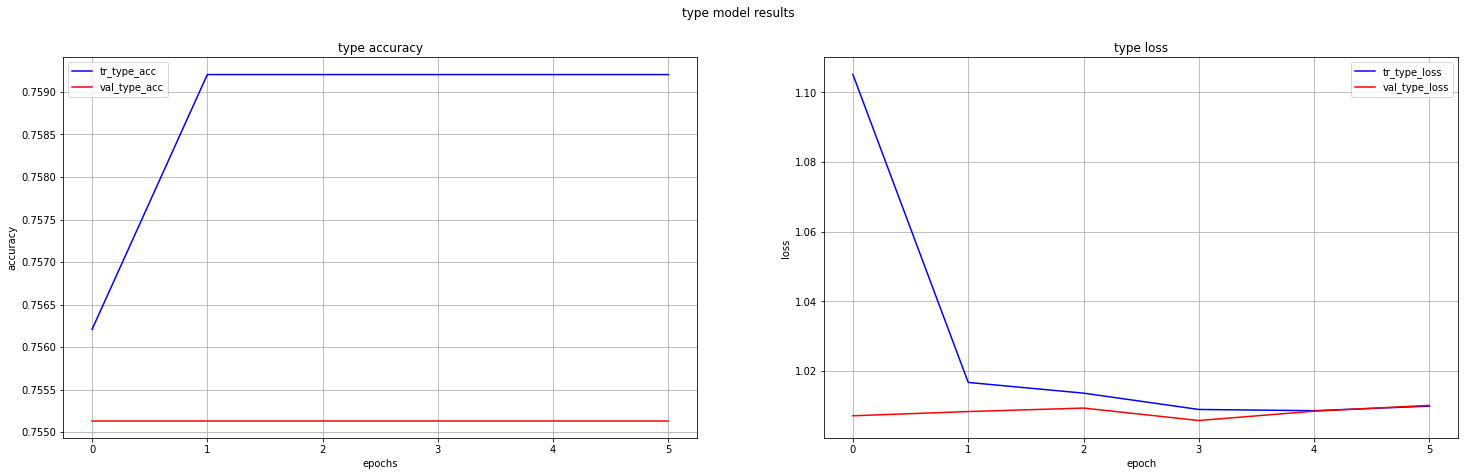

In [ ]:
train_val_loss_plt_type(history_SS_T3)

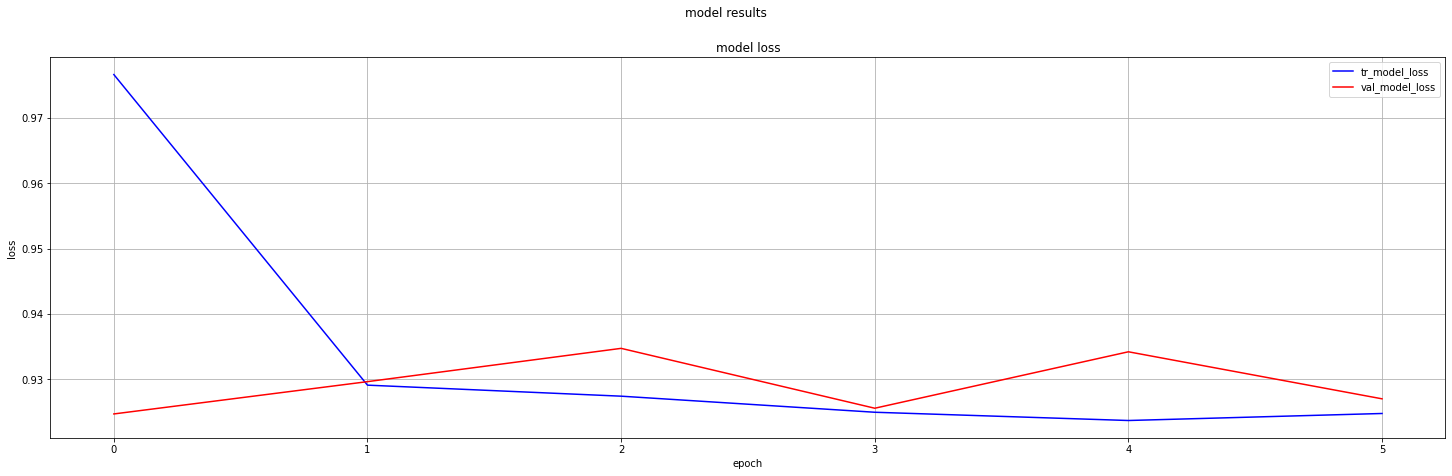

In [ ]:
train_val_loss_plt_model(history_SS_T3)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_SS,
        'image': x_val_image_SS},
  y= {'price': y_val_price_SS,
    'type':y_val_type_SS})
print("test loss, test acc:", res_eva)


46/46 [==============================] - 5s 94ms/step - loss: 0.9189 - price_loss: 0.8385 - type_loss: 0.9993 - price_sparse_categorical_accuracy: 0.6322 - type_sparse_categorical_accuracy: 0.7562
test loss, test acc: [0.9188657402992249, 0.8384776711463928, 0.9992539286613464, 0.6321917772293091, 0.7561643719673157]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_SS_k,
        'image': x_test_image_SS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 22s 92ms/step
[[0.5843885  0.35198334 0.06362817]
 [0.5843885  0.35198334 0.06362817]
 [0.5843885  0.35198334 0.06362817]
 ...
 [0.5843885  0.35198334 0.06362817]
 [0.5843885  0.35198334 0.06362817]
 [0.5843885  0.35198334 0.06362817]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_SS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_SS_T3.csv', index=False)


the score of evalution model in this trial is  [loss: 0.9189 - price_loss: 0.8385 - type_loss: 0.9993 - price_sparse_categorical_accuracy: 0.6322 - type_sparse_categorical_accuracy: 0.7562]

 the test score on the kaggle leaderboard is 0.63

###Trial_4

in this trial  i will add depth to image by adding conv2D Layer and maxpooling layers and use GRU layer for text




In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
gru = keras.layers.GRU(128, 
                       activation="tanh",
                       recurrent_activation="sigmoid",
                       return_sequences=True,
                       dropout=0.1,
                       recurrent_dropout=0.1)(embedded)
gru2 = keras.layers.GRU(64, 
                        activation="tanh",
                        recurrent_activation="sigmoid",
                        return_sequences=True,
                        dropout=0.1,
                        recurrent_dropout=0.1)(gru)
gru3 = keras.layers.GRU(32, 
                        activation="tanh",
                        recurrent_activation="sigmoid",
                        return_sequences=False,
                        dropout=0.1,
                        recurrent_dropout=0.1)(gru2)

# image part 
cov = Conv2D(32, (3, 3))(in_image) 
pl = MaxPool2D((3, 3))(cov) 
cov2 = Conv2D(32, (2,2))(pl) 
pl2 = MaxPool2D((2,2))(cov2) 
flattened = Flatten()(pl2) # flatten the shape

# fusion - combinig both
fused = tf.concat([gru3, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 62, 62, 32)   608         ['input_10[0][0]']               
                                                                                                  
 embedding_4 (Embedding)        (None, 100, 100)     4000000     ['input_9[0][0]']                
                                                                                            

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_SS,
        'image': x_train_image_SS
    },
    y={
        'type': y_train_type_SS,
        'price': y_train_price_SS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=3,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
292/292 [==============================] - 132s 431ms/step - loss: 0.9755 - price_loss: 0.8561 - type_loss: 1.0949 - price_sparse_categorical_accuracy: 0.6214 - type_sparse_categorical_accuracy: 0.7566 - val_loss: 0.9383 - val_price_loss: 0.8576 - val_type_loss: 1.0189 - val_price_sparse_categorical_accuracy: 0.5976 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 2/15
292/292 [==============================] - 126s 431ms/step - loss: 0.9187 - price_loss: 0.8354 - type_loss: 1.0020 - price_sparse_categorical_accuracy: 0.6224 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.9033 - val_price_loss: 0.8326 - val_type_loss: 0.9740 - val_price_sparse_categorical_accuracy: 0.5976 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 3/15
292/292 [==============================] - 126s 431ms/step - loss: 0.8849 - price_loss: 0.8195 - type_loss: 0.9504 - price_sparse_categorical_accuracy: 0.6211 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.8947 - val_price_loss

In [ ]:
history_SS_T4=history

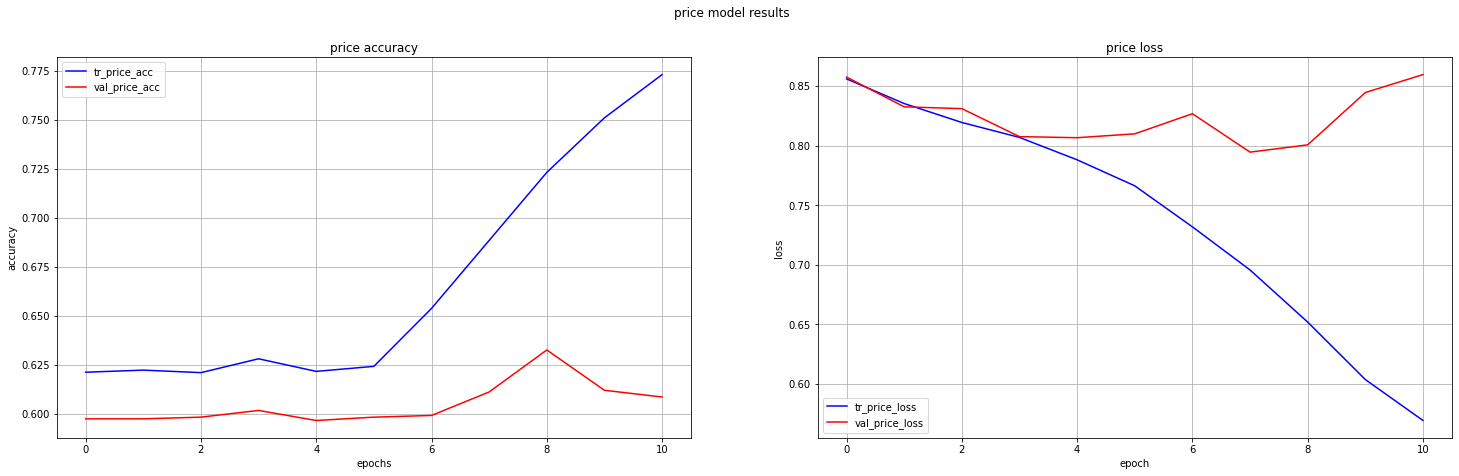

In [ ]:
train_val_loss_plt_price(history_SS_T4)

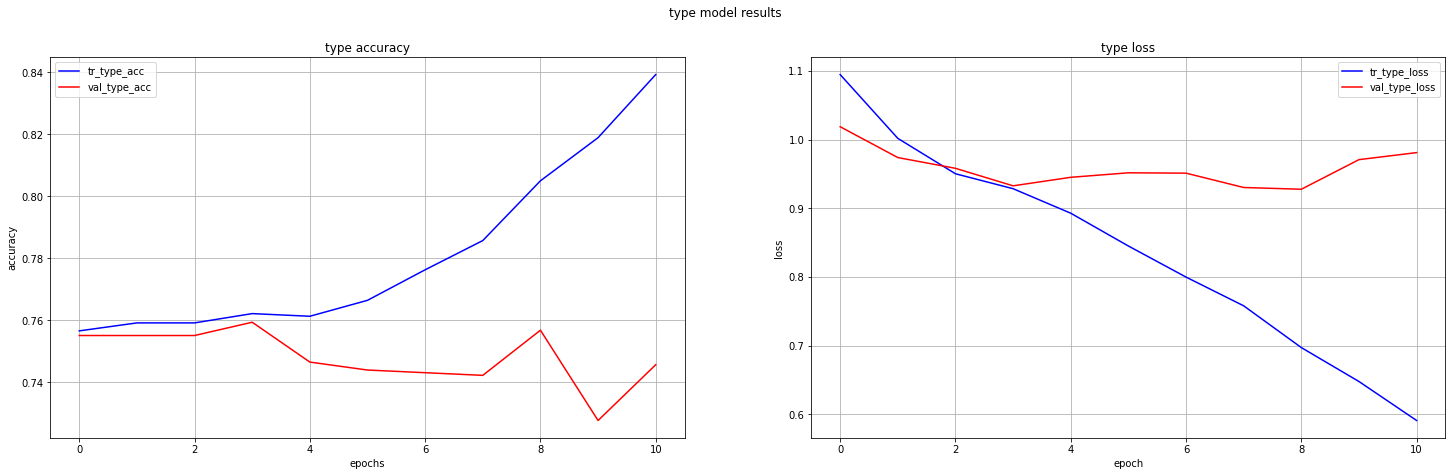

In [ ]:
train_val_loss_plt_type(history_SS_T4)

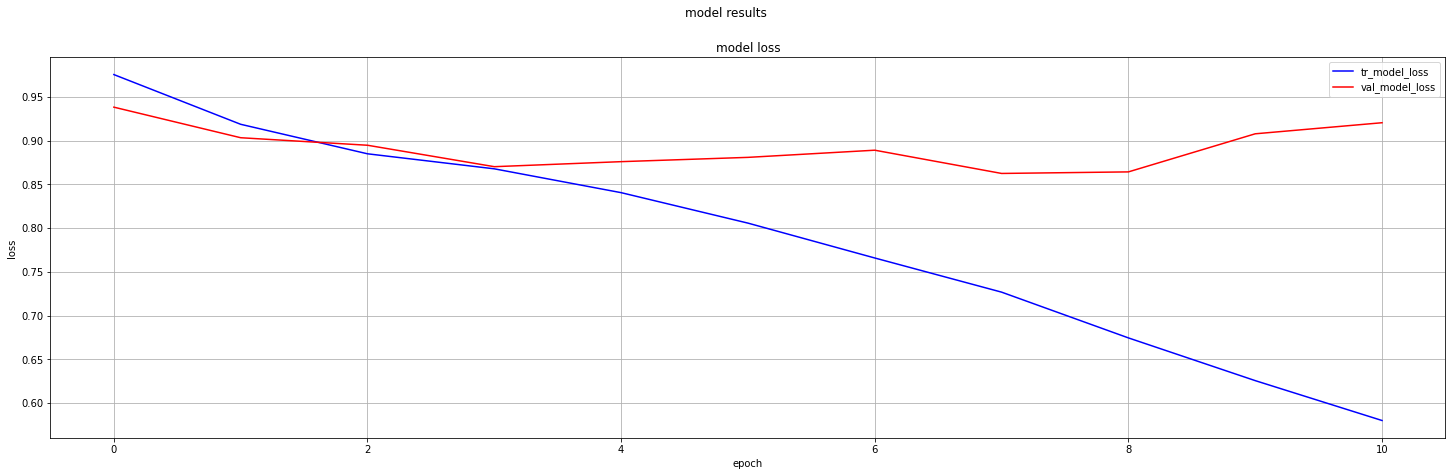

In [ ]:
train_val_loss_plt_model(history_SS_T4)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_SS,
        'image': x_val_image_SS},
  y= {'price': y_val_price_SS,
    'type':y_val_type_SS})
print("test loss, test acc:", res_eva)


46/46 [==============================] - 5s 84ms/step - loss: 0.8431 - price_loss: 0.8028 - type_loss: 0.8833 - price_sparse_categorical_accuracy: 0.5726 - type_sparse_categorical_accuracy: 0.7610
test loss, test acc: [0.8430553674697876, 0.8028026819229126, 0.8833080530166626, 0.5726027488708496, 0.7609589099884033]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_SS_k,
        'image': x_test_image_SS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 20s 80ms/step
[[0.6080775  0.24079609 0.15112633]
 [0.8907417  0.09347155 0.01578675]
 [0.63877803 0.23831135 0.12291073]
 ...
 [0.31130472 0.5276127  0.16108267]
 [0.39644524 0.5148265  0.08872826]
 [0.33749732 0.56343234 0.09907031]]
[0 0 0 ... 1 1 1]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_SS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_SS_T4.csv', index=False)


the score of evalution model in this trial is  [loss: 0.8431 - price_loss: 0.8028 - type_loss: 0.8833 - price_sparse_categorical_accuracy: 0.5726 - type_sparse_categorical_accuracy: 0.7610]

 the test score on the kaggle leaderboard is 0.62

###Trial_5

in this trial add Bidirectional RNN (LSTM)


In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# Bidirectional Layer:
# Bidirectional LSTMs are an extension of traditional LSTMs that can improve model
# performance on sequence classification problems.
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
bidirectional1 = keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=True))(embedded)
bidirectional2 = keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=True))(bidirectional1)
bidirectional3 = keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=False))(bidirectional2)

# image part 
cov = Conv2D(32, (3, 3))(in_image) 
pl = MaxPool2D((3, 3))(cov) 
cov2 = Conv2D(32, (2,2))(pl) 
pl2 = MaxPool2D((2,2))(cov2)
flattened = Flatten()(pl2) # flatten the shape 

# fusion - combinig both
fused = tf.concat([bidirectional3, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 62, 62, 32)   608         ['input_12[0][0]']               
                                                                                                  
 embedding_5 (Embedding)        (None, 100, 100)     4000000     ['input_11[0][0]']               
                                                                                            

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_SS,
        'image': x_train_image_SS
    },
    y={
        'type': y_train_type_SS,
        'price': y_train_price_SS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=3,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
292/292 [==============================] - 167s 541ms/step - loss: 0.9573 - price_loss: 0.8360 - type_loss: 1.0785 - price_sparse_categorical_accuracy: 0.6205 - type_sparse_categorical_accuracy: 0.7545 - val_loss: 0.8718 - val_price_loss: 0.7744 - val_type_loss: 0.9693 - val_price_sparse_categorical_accuracy: 0.6592 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 2/15
292/292 [==============================] - 155s 530ms/step - loss: 0.8576 - price_loss: 0.7315 - type_loss: 0.9837 - price_sparse_categorical_accuracy: 0.6939 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.8591 - val_price_loss: 0.7660 - val_type_loss: 0.9523 - val_price_sparse_categorical_accuracy: 0.6815 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 3/15
292/292 [==============================] - 154s 528ms/step - loss: 0.8119 - price_loss: 0.6664 - type_loss: 0.9574 - price_sparse_categorical_accuracy: 0.7254 - type_sparse_categorical_accuracy: 0.7592 - val_loss: 0.8509 - val_price_loss

In [ ]:
history_SS_T5=history

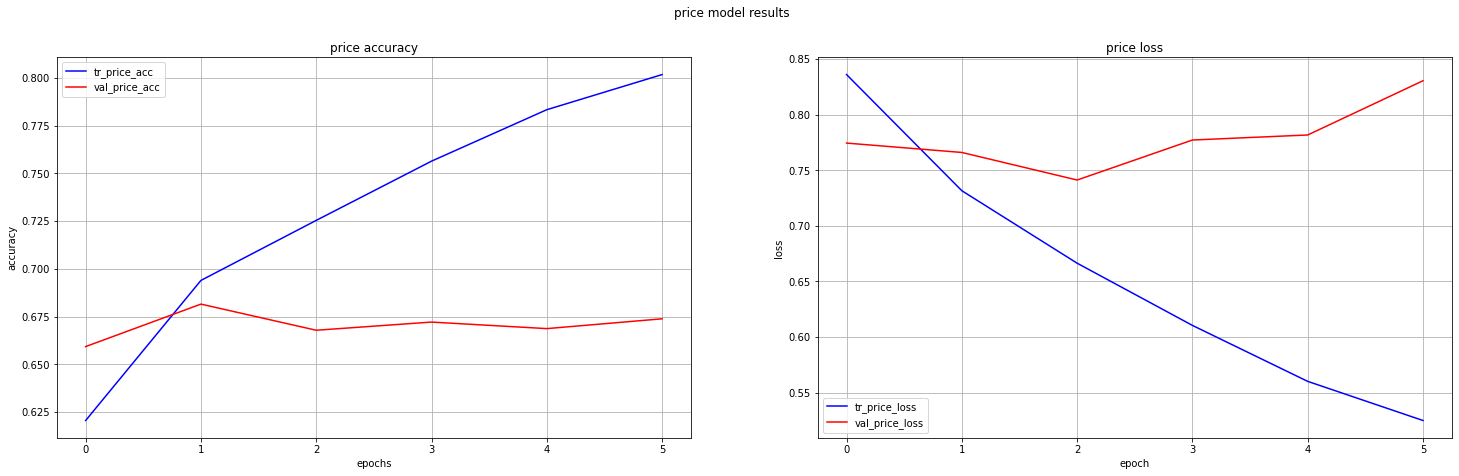

In [ ]:
train_val_loss_plt_price(history_SS_T5)

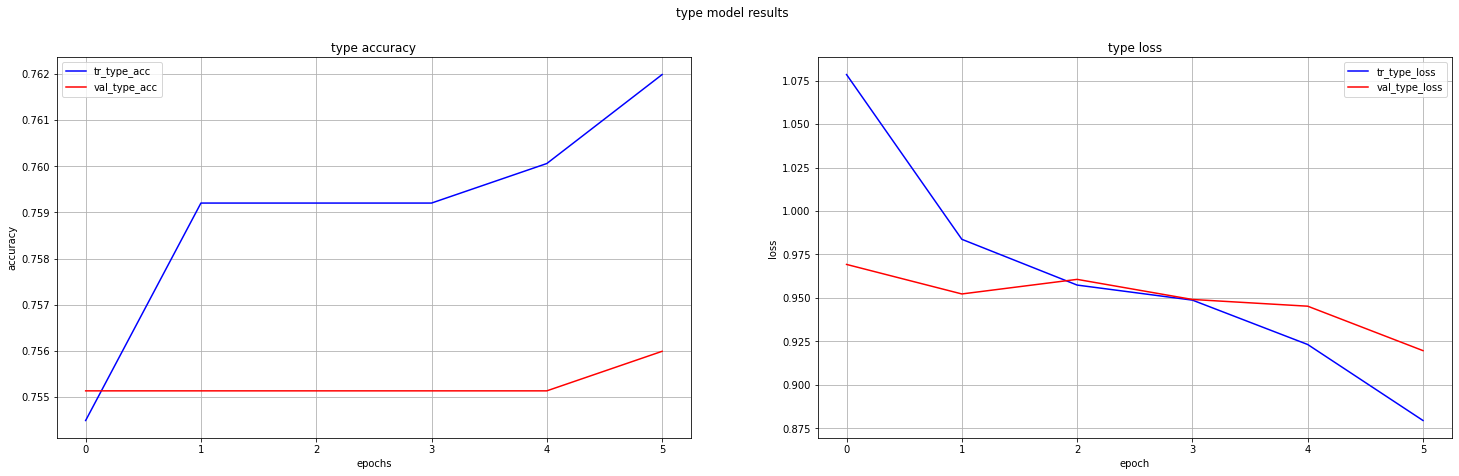

In [ ]:
train_val_loss_plt_type(history_SS_T5)

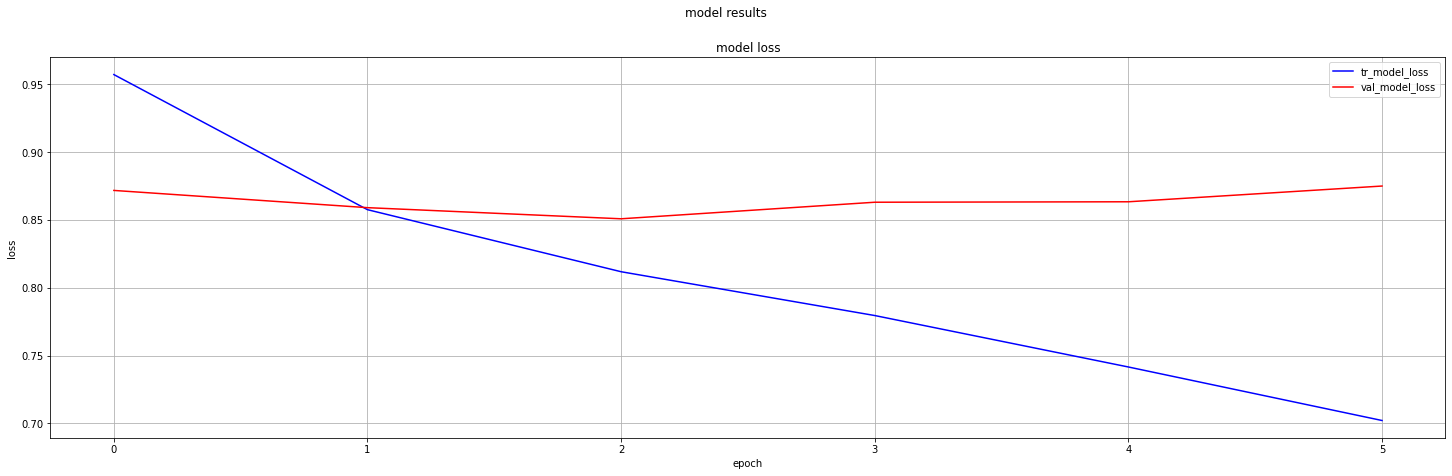

In [ ]:
train_val_loss_plt_model(history_SS_T5)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_SS,
        'image': x_val_image_SS},
  y= {'price': y_val_price_SS,
    'type':y_val_type_SS})
print("test loss, test acc:", res_eva)


46/46 [==============================] - 14s 229ms/step - loss: 0.8612 - price_loss: 0.7445 - type_loss: 0.9779 - price_sparse_categorical_accuracy: 0.6712 - type_sparse_categorical_accuracy: 0.7562
test loss, test acc: [0.8611718416213989, 0.7444853186607361, 0.9778584241867065, 0.6712328791618347, 0.7561643719673157]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_SS_k,
        'image': x_test_image_SS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 56s 232ms/step
[[0.50775665 0.444832   0.04741143]
 [0.84803015 0.13814665 0.0138232 ]
 [0.8538526  0.1328948  0.01325258]
 ...
 [0.62769526 0.33877897 0.03352573]
 [0.80218893 0.18021089 0.01760011]
 [0.6328931  0.33426392 0.03284308]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_SS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_SS_T5.csv', index=False)

the score of evalution model is  [loss: 0.8612 - price_loss: 0.7445 - type_loss: 0.9779 - price_sparse_categorical_accuracy: 0.6712 - type_sparse_categorical_accuracy: 0.7562]

 the test score on the kaggle leaderboard is 0.67

###Trial_6

in this trial add Bidirectional RNN (GRU)


In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# Bidirectional Layer:
# performance on sequence classification problems.
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
bidirectional1 = keras.layers.Bidirectional(keras.layers.GRU(100, return_sequences=True,activation="tanh", recurrent_activation="sigmoid",dropout=0.1,recurrent_dropout=0.1))(embedded)
bidirectional2 = keras.layers.Bidirectional(keras.layers.GRU(100, return_sequences=True,activation="tanh", recurrent_activation="sigmoid",dropout=0.1,recurrent_dropout=0.1))(bidirectional1)
bidirectional3 = keras.layers.Bidirectional(keras.layers.GRU(100, return_sequences=False,activation="tanh", recurrent_activation="sigmoid",dropout=0.1,recurrent_dropout=0.1))(bidirectional2)

# image part 
cov = Conv2D(32, (3, 3))(in_image) 
pl = MaxPool2D((3, 3))(cov) 
cov2 = Conv2D(32, (2,2))(pl) 
pl2 = MaxPool2D((2,2))(cov2) 
flattened = Flatten()(pl2) # flatten the shape 


# fusion - combinig both
fused = tf.concat([bidirectional3, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_11 (Conv2D)             (None, 62, 62, 32)   608         ['input_14[0][0]']               
                                                                                                  
 embedding_6 (Embedding)        (None, 100, 100)     4000000     ['input_13[0][0]']               
                                                                                            

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_SS,
        'image': x_train_image_SS
    },
    y={
        'type': y_train_type_SS,
        'price': y_train_price_SS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=3,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
292/292 [==============================] - 363s 1s/step - loss: 0.9173 - price_loss: 0.8045 - type_loss: 1.0301 - price_sparse_categorical_accuracy: 0.6321 - type_sparse_categorical_accuracy: 0.7603 - val_loss: 0.8239 - val_price_loss: 0.7789 - val_type_loss: 0.8689 - val_price_sparse_categorical_accuracy: 0.6370 - val_type_sparse_categorical_accuracy: 0.7783
Epoch 2/15
292/292 [==============================] - 350s 1s/step - loss: 0.7698 - price_loss: 0.7161 - type_loss: 0.8236 - price_sparse_categorical_accuracy: 0.6809 - type_sparse_categorical_accuracy: 0.7716 - val_loss: 0.7835 - val_price_loss: 0.7449 - val_type_loss: 0.8221 - val_price_sparse_categorical_accuracy: 0.6567 - val_type_sparse_categorical_accuracy: 0.7714
Epoch 3/15
292/292 [==============================] - 366s 1s/step - loss: 0.6990 - price_loss: 0.6599 - type_loss: 0.7381 - price_sparse_categorical_accuracy: 0.7128 - type_sparse_categorical_accuracy: 0.7917 - val_loss: 0.7821 - val_price_loss: 0.7732 

In [ ]:
history_SS_T6=history

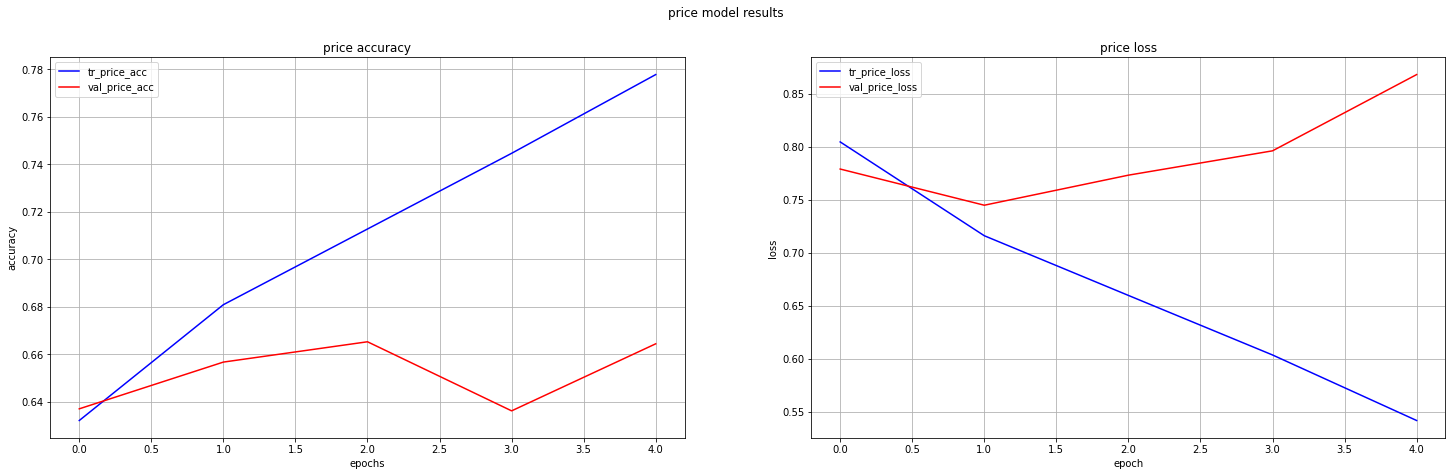

In [ ]:
train_val_loss_plt_price(history_SS_T6)

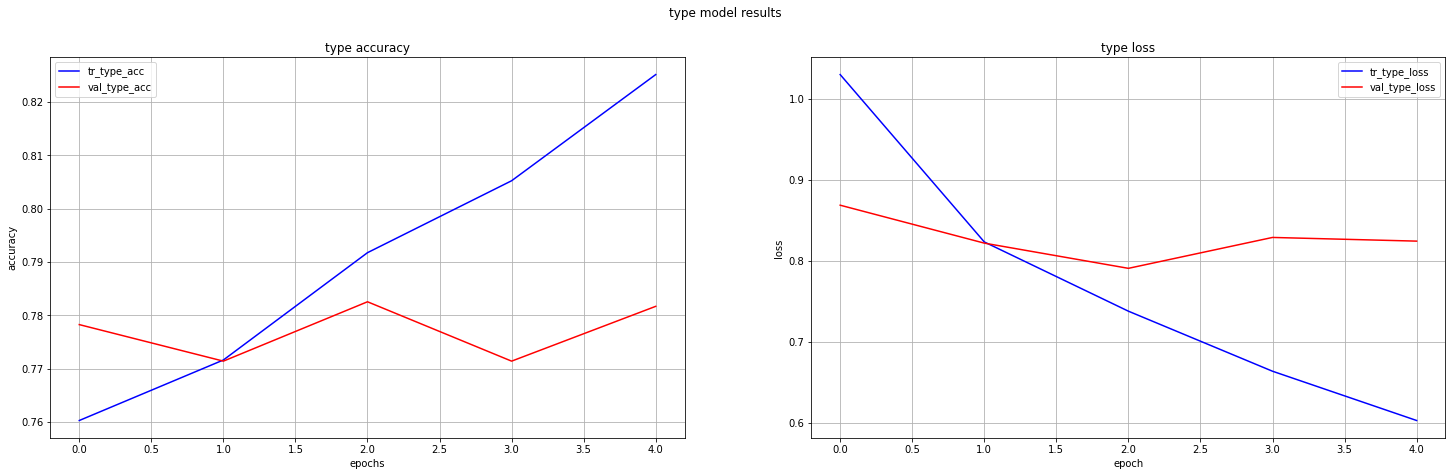

In [ ]:
train_val_loss_plt_type(history_SS_T6)

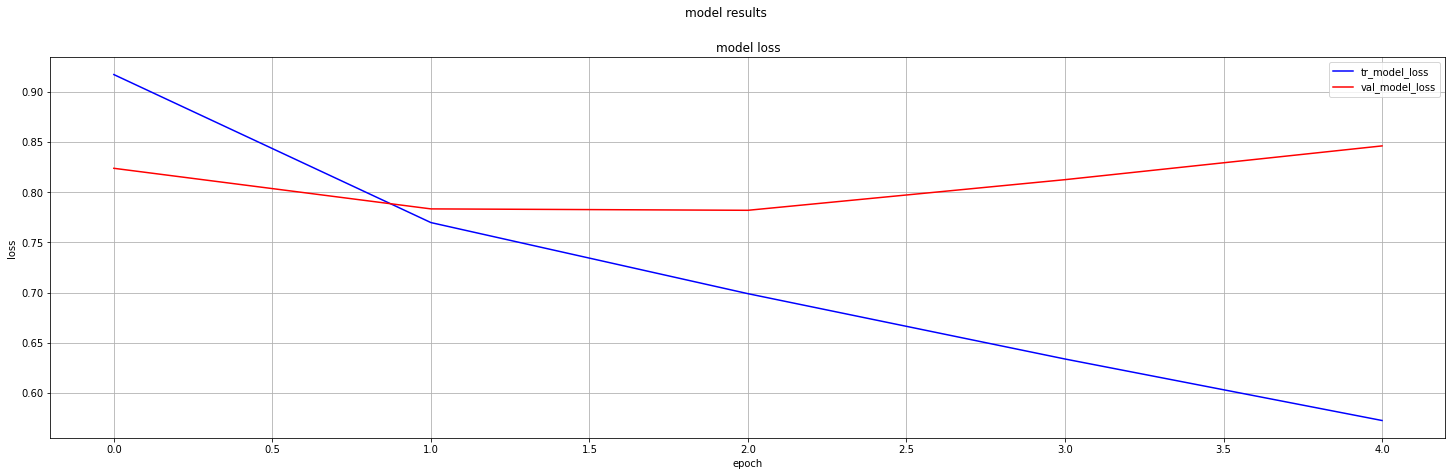

In [ ]:
train_val_loss_plt_model(history_SS_T6)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_SS,
        'image': x_val_image_SS},
  y= {'price': y_val_price_SS,
    'type':y_val_type_SS})
print("test loss, test acc:", res_eva)


46/46 [==============================] - 13s 242ms/step - loss: 0.7860 - price_loss: 0.7392 - type_loss: 0.8328 - price_sparse_categorical_accuracy: 0.6623 - type_sparse_categorical_accuracy: 0.7705
test loss, test acc: [0.7859731316566467, 0.7391699552536011, 0.8327761292457581, 0.6623287796974182, 0.7705479264259338]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_SS_k,
        'image': x_test_image_SS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 48s 199ms/step
[[0.72454184 0.22335285 0.05210536]
 [0.9299625  0.06083166 0.00920568]
 [0.89128506 0.09217471 0.0165403 ]
 ...
 [0.7966187  0.17171751 0.03166382]
 [0.865798   0.11384238 0.02035974]
 [0.6287787  0.30836102 0.06286018]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_SS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_SS_T6.csv', index=False)


the score of evalution model is  [loss: 0.7860 - price_loss: 0.7392 - type_loss: 0.8328 - price_sparse_categorical_accuracy: 0.6623 - type_sparse_categorical_accuracy: 0.7705]

 the test score on the kaggle leaderboard to 0.67

###Trial_7

in this trial Add drop-out regularization in the image component of the model to reduce the overfitting behaviour. Also using L2 recurrent regularization on the text component of the model.




In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
bi_lstm =  keras.layers.Bidirectional(keras.layers.GRU(20, recurrent_regularizer='l2'))(embedded) # adding quadratic regularizer

# image part
cov = Conv2D(32, (3, 3))(in_image) 
drop = Dropout(0.2)(cov) 
pl = MaxPool2D((3, 3))(drop) 
cov2 = Conv2D(32, (2,2))(pl) 
drop2 = Dropout(0.2)(cov2) 
pl2 = MaxPool2D((2,2))(drop2) 
flattened = Flatten()(pl2) 

# fusion:
fused = tf.concat([bi_lstm, flattened], axis=-1) # concatenate text features with images

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)

# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_13 (Conv2D)             (None, 62, 62, 32)   608         ['input_16[0][0]']               
                                                                                                  
 dropout (Dropout)              (None, 62, 62, 32)   0           ['conv2d_13[0][0]']              
                                                                                                  
 max_pooling2d_13 (MaxPooling2D  (None, 20, 20, 32)  0           ['dropout[0][0]']                
 )                                                                                          

In [ ]:
history = model.fit(
    x={
        'summary': x_train_summary_SS,
        'image': x_train_image_SS
    },
    y={
        'type': y_train_type_SS,
        'price': y_train_price_SS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=3,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
292/292 [==============================] - 47s 150ms/step - loss: 1.0724 - price_loss: 0.8262 - type_loss: 1.1028 - price_sparse_categorical_accuracy: 0.6291 - type_sparse_categorical_accuracy: 0.7568 - val_loss: 0.9170 - val_price_loss: 0.7746 - val_type_loss: 1.0320 - val_price_sparse_categorical_accuracy: 0.6327 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 2/15
292/292 [==============================] - 43s 147ms/step - loss: 0.8176 - price_loss: 0.7189 - type_loss: 0.8901 - price_sparse_categorical_accuracy: 0.6800 - type_sparse_categorical_accuracy: 0.7611 - val_loss: 0.8320 - val_price_loss: 0.7415 - val_type_loss: 0.8984 - val_price_sparse_categorical_accuracy: 0.6541 - val_type_sparse_categorical_accuracy: 0.7620
Epoch 3/15
292/292 [==============================] - 43s 146ms/step - loss: 0.7495 - price_loss: 0.6647 - type_loss: 0.8046 - price_sparse_categorical_accuracy: 0.7140 - type_sparse_categorical_accuracy: 0.7740 - val_loss: 0.8491 - val_price_loss: 0

In [ ]:
history_SS_T7=history

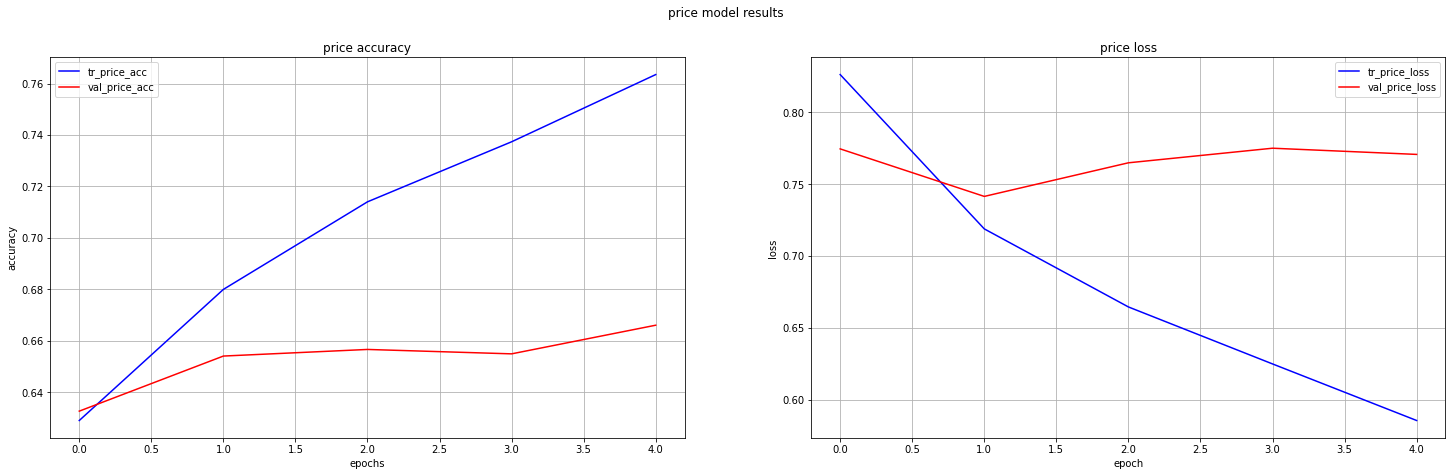

In [ ]:
train_val_loss_plt_price(history_SS_T7)

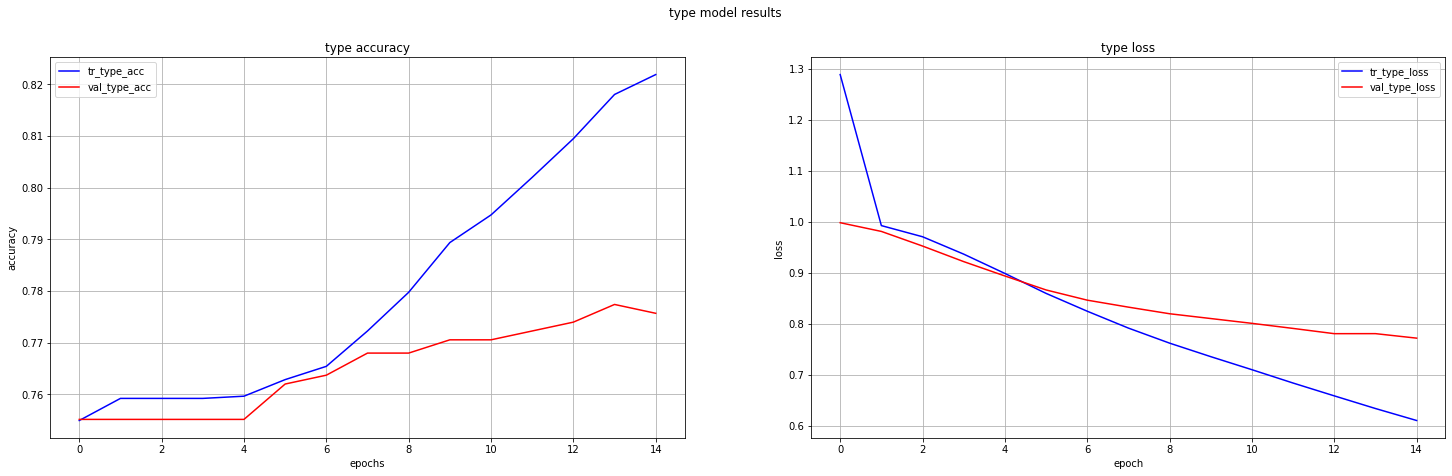

In [ ]:
train_val_loss_plt_type(history_SS_T1)

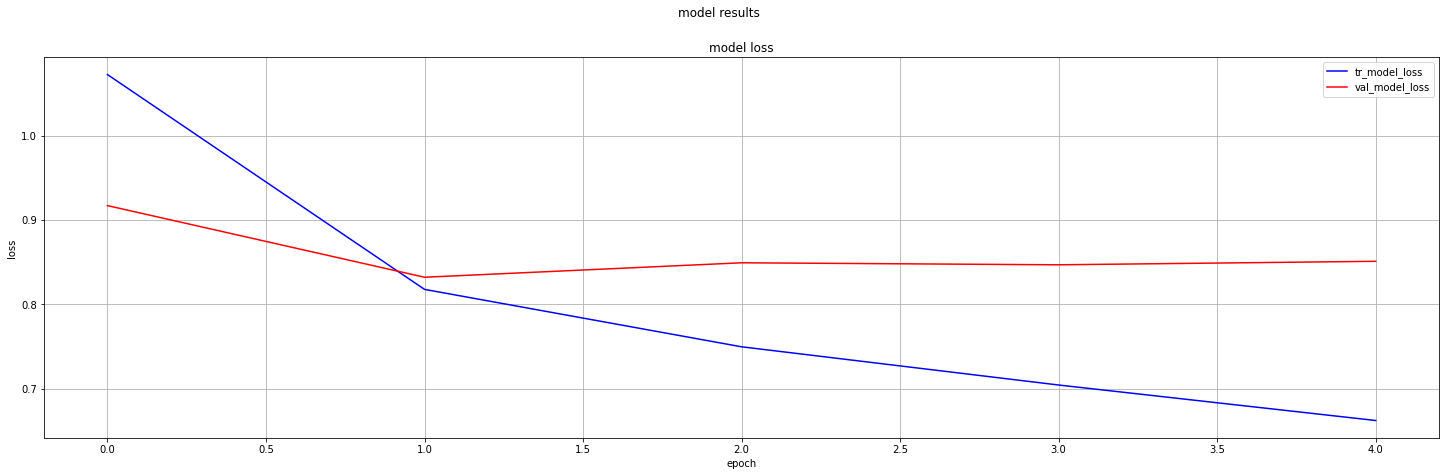

In [ ]:
train_val_loss_plt_model(history_SS_T7)

In [ ]:
res_eva=model.evaluate(x= {
     'summary': x_val_summary_SS,
        'image': x_val_image_SS},
  y= {'price': y_val_price_SS,
    'type':y_val_type_SS})
print("test loss, test acc:", res_eva)


46/46 [==============================] - 3s 41ms/step - loss: 0.8304 - price_loss: 0.7480 - type_loss: 0.8886 - price_sparse_categorical_accuracy: 0.6527 - type_sparse_categorical_accuracy: 0.7664
test loss, test acc: [0.8303755521774292, 0.7480420470237732, 0.8886002898216248, 0.6527397036552429, 0.766438364982605]


In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_SS_k,
        'image': x_test_image_SS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 10s 40ms/step
[[0.63397664 0.25696272 0.10906056]
 [0.9611954  0.03256284 0.00624175]
 [0.8849699  0.09249447 0.02253568]
 ...
 [0.6595005  0.2840117  0.05648785]
 [0.8493348  0.10683404 0.04383113]
 [0.64802617 0.30364016 0.04833371]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_SS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_SS_T7.csv', index=False)

the score of evalution model in this trial is  [loss: 0.8304 - price_loss: 0.7480 - type_loss: 0.8886 - price_sparse_categorical_accuracy: 0.6527 - type_sparse_categorical_accuracy: 0.7664]

 the test score on the kaggle leaderboard is 0.66

###trial 8

in this trial use transfer learning with VGG16

In [ ]:
x_tr_image=x_train_image_SS
x_vl_image=x_val_image_SS


(5840, 64, 64, 3)
(1460, 64, 64, 3)


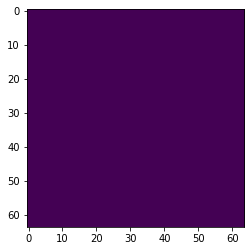

In [ ]:
from keras.applications.vgg16 import VGG16

# VGG needs input images with 3 channels, so I'll extend the training data to have 3 channels and appear RGB
# x_tr_image is currently (6101, 64, 64, 2)
rgb_tr = x_tr_image[:,:,:,0]
rgb_vl = x_vl_image[:,:,:,0]
# rgb.shape # now it's (6101, 64, 64)
plt.imshow(rgb_tr[0, :, :]) # looks the same as it did before
rgb_tr = np.repeat(rgb_tr[..., np.newaxis], 3, -1) # repeat the same values across 3 channels
rgb_vl = np.repeat(rgb_vl[..., np.newaxis], 3, -1) # repeat the same values across 3 channels
print(rgb_tr.shape) # now we have 487 samples of (6101, 64, 64, 3)
print(rgb_vl.shape) # now we have 487 samples of (1526, 64, 64, 3)

In [ ]:
base = VGG16(include_top=False, input_shape=(64,64,3)) 
base.trainable = False # freezing the weights

In [ ]:
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 3)) # input shape for batches of images (size 64x64x2)

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
# averaged = tf.reduce_mean(embedded, axis=1) # compute the mean of the embeddings to reduce the rank of the embedding
attention = keras.layers.MultiHeadAttention(num_heads=2, key_dim=2)(embedded, embedded)
bi_lstm =  keras.layers.Bidirectional(keras.layers.GRU(50, recurrent_regularizer='l2'))(attention) # adding quadratic regularizer

# image part
scaling = keras.layers.Rescaling(1./127.5, offset=-1)(in_image) # rescaling to [-1,1] for VGG16
vgg = base(scaling, training=False) # pass the base model the scaled inputs
pl = keras.layers.GlobalAveragePooling2D()(vgg) # global average pooling, pretty much the same as flattening
do = Dropout(0.2)(pl) # dropout at a rate of 20%
fl = Flatten()(do) # flattening anyways


# fusion:
fused = tf.concat([bi_lstm, fl], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]

# model definition
bi_vgg_model = keras.Model(
      inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
        'type': p_type,
    },
)

bi_vgg_model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
        'type': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 0.5,
        'type': 0.5,       
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
        'type': ['SparseCategoricalAccuracy'],
    },
)

bi_vgg_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 rescaling_3 (Rescaling)        (None, 64, 64, 3)    0           ['input_28[0][0]']               
                                                                                                  
 input_27 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 vgg16 (Functional)             (None, 2, 2, 512)    14714688    ['rescaling_3[0][0]']            
                                                                                           

In [ ]:
history = bi_vgg_model.fit(
    x={
        'summary': x_train_summary_SS,
        'image': rgb_tr
    },
    y={
        'type': y_train_type_SS,
        'price': y_train_price_SS,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=3,restore_best_weights=True )
    ],
    verbose=1
)

Epoch 1/15
292/292 [==============================] - 364s 1s/step - loss: 1.1788 - price_loss: 0.8620 - type_loss: 1.1388 - price_sparse_categorical_accuracy: 0.6068 - type_sparse_categorical_accuracy: 0.7290 - val_loss: 0.8886 - val_price_loss: 0.8372 - val_type_loss: 0.9317 - val_price_sparse_categorical_accuracy: 0.5976 - val_type_sparse_categorical_accuracy: 0.7551
Epoch 2/15
292/292 [==============================] - 308s 1s/step - loss: 0.8695 - price_loss: 0.8355 - type_loss: 0.8996 - price_sparse_categorical_accuracy: 0.6126 - type_sparse_categorical_accuracy: 0.7622 - val_loss: 0.8350 - val_price_loss: 0.8105 - val_type_loss: 0.8566 - val_price_sparse_categorical_accuracy: 0.6036 - val_type_sparse_categorical_accuracy: 0.7611
Epoch 3/15
292/292 [==============================] - 284s 975ms/step - loss: 0.8162 - price_loss: 0.8055 - type_loss: 0.8242 - price_sparse_categorical_accuracy: 0.6134 - type_sparse_categorical_accuracy: 0.7673 - val_loss: 0.8376 - val_price_loss: 0.79

In [ ]:
history_SS_T8=history

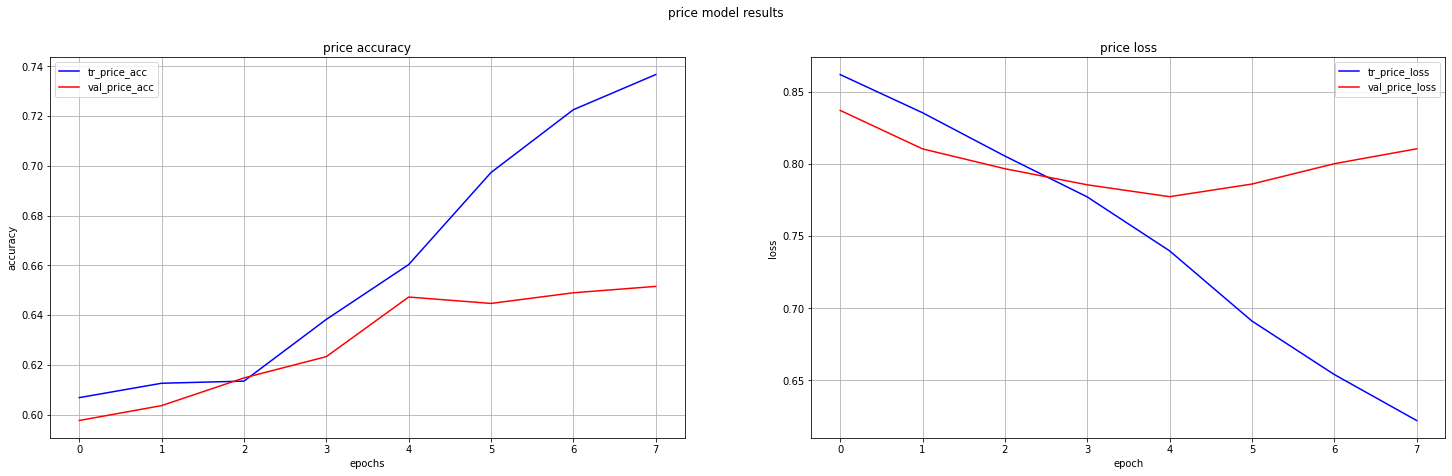

In [ ]:
train_val_loss_plt_price(history_SS_T8)

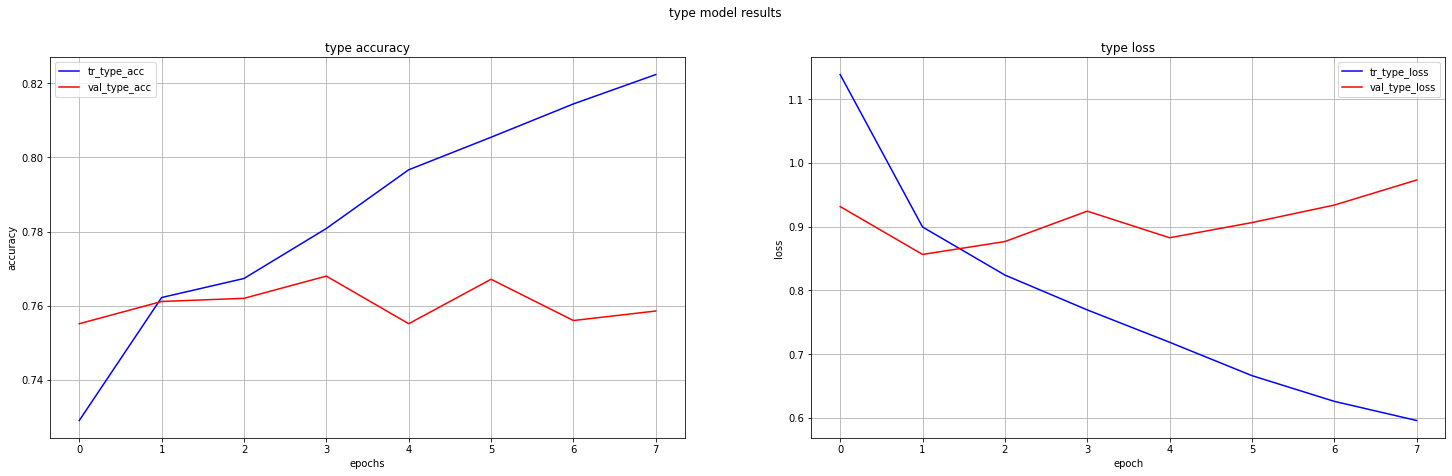

In [ ]:
train_val_loss_plt_type(history_SS_T8)

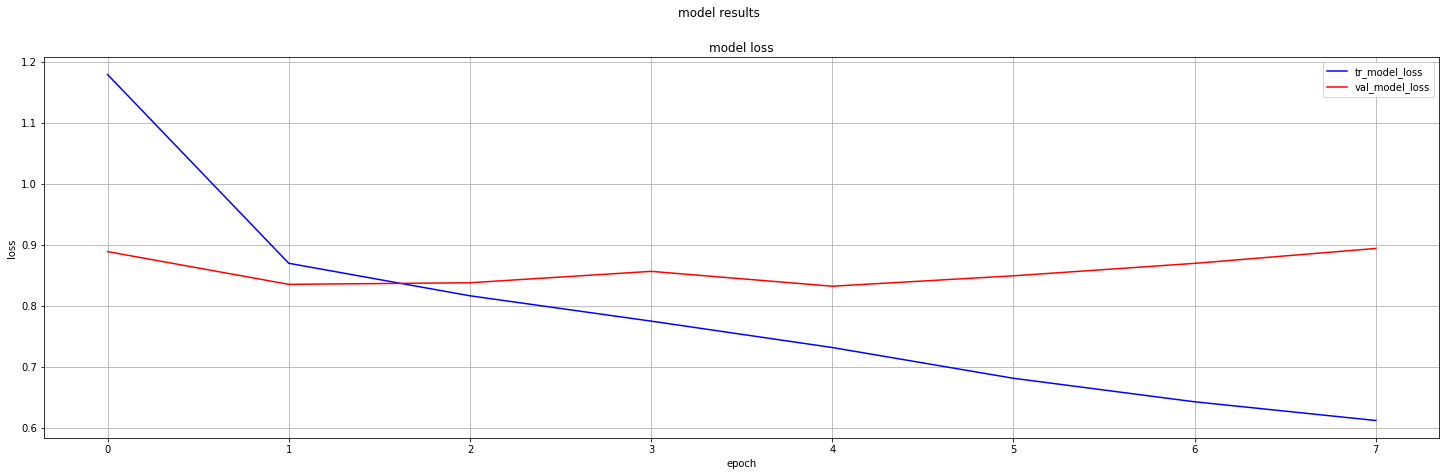

In [ ]:
train_val_loss_plt_model(history_SS_T8)

In [ ]:
y_val_type_SS.unique()

array([ 1,  2, 20, 10, 17, 14,  0, 13, 18, 22, 15, 23,  8,  3,  5,  4, 12,
       11], dtype=int8)

In [ ]:
y_train_type_SS.unique()

array([ 1, 11, 10, 17,  2, 22, 19, 18, 20, 15, 13,  0,  4,  5, 14, 23,  7,
        3,  9, 21,  6, 16], dtype=int8)

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_summary_SS_k,
        'image': x_test_image_SS_k
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 9s 41ms/step
[[0.63397664 0.25696272 0.10906056]
 [0.9611954  0.03256284 0.00624175]
 [0.8849699  0.09249447 0.02253568]
 ...
 [0.6595005  0.2840117  0.05648785]
 [0.8493348  0.10683404 0.04383113]
 [0.64802617 0.30364016 0.04833371]]
[0 0 0 ... 0 0 0]


In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': df_test_SS_K.id,
     'price': price_category_predicted}
).to_csv('sample_submission_SS_T8.csv', index=False)



the score of evalution model is  [loss: 0.8462 - price_loss: 0.7741 - type_loss: 0.8902 - price_sparse_categorical_accuracy: 0.6392 - type_sparse_categorical_accuracy: 0.7776]

 the test score on the kaggle leaderboard is 0.66